# **Housing Price Prediction**
---
### **Problem Statement**
---
>A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
*   Which variables are significant in predicting the price of a house
*   How well those variables describe the price of a house.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

---



In [893]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 300)

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV , KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# For Calculate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

## 1. Data Understanding, Preparation and EDA

In [894]:
housing_df = pd.read_csv("train.csv")
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

* There are 81 fields from the raw dataset
* The target variable is SalePrice

In [895]:
# checking the shape of the dataframe
housing_df.shape

(1460, 81)

In [896]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [897]:
# Getting basic statistical details of the data frame
housing_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

### Duplicate Rows Detection
---

In [898]:
# Checking duplicate rows
row, column = housing_df[housing_df.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')

There are no duplicates in the dataset.


In [899]:
num = 0
for i in housing_df.columns:
    if len(housing_df[i].unique())  == 0:
        num += 1
        print("Feature " + i + " has only one unique value and can be ignored")
    else:
       if len(housing_df[i].unique())  == housing_df.shape[0]:
          num += 1
          print("Feature " + i + " has only all unique value in entire dataset and can be ignored")

if(num == 0):
    print("No columns has only one unique value")

Feature Id has only all unique value in entire dataset and can be ignored


>Dropping Id column as it does not contribute towards predicting SalePrice

In [900]:
# Removing unnecessary columns
housing_df.drop(["Id"], axis = 1, inplace = True)
print("DataFrame Shape after removing unnecessary columns: \n", housing_df.shape)

DataFrame Shape after removing unnecessary columns: 
 (1460, 80)


### Missing Value Handling
---

In [901]:
def get_missing_info(dataframe, col_names):
    missing_df = pd.DataFrame(dataframe[col_names].isna().sum(), columns=["count_of_isna"])
    missing_df['na_percent'] = round(missing_df["count_of_isna"] / len(dataframe[col_names]) * 100, 2)
    return missing_df[missing_df["count_of_isna"] > 0].sort_values(by='count_of_isna')

In [902]:
get_missing_info(housing_df, housing_df.columns)

count_of_isna  na_percent
Electrical                1        0.07
MasVnrType                8        0.55
MasVnrArea                8        0.55
BsmtQual                 37        2.53
BsmtCond                 37        2.53
BsmtFinType1             37        2.53
BsmtExposure             38        2.60
BsmtFinType2             38        2.60
GarageCond               81        5.55
GarageQual               81        5.55
GarageFinish             81        5.55
GarageType               81        5.55
GarageYrBlt              81        5.55
LotFrontage             259       17.74
FireplaceQu             690       47.26
Fence                  1179       80.75
Alley                  1369       93.77
MiscFeature            1406       96.30
PoolQC                 1453       99.52

> According to the data dictionary the NULL/NA values present in these columns is showing the absence of fascility so it does not affect the property price.
* For 'Alley', Nan means 'No access to alley'
* For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'
* For 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' Nan means 'No garage'
* For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively
* For 'MiscFeature' Nan means no additional features mentioned.

So replacing those NULL values with "None" label.

In [903]:
# Replacing those NULL values with "None" label.
valid_nulls = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
for col in valid_nulls:
    housing_df[col].fillna("None", inplace=True)

In [904]:
#Rechecking missing values
get_missing_info(housing_df, housing_df.columns)

count_of_isna  na_percent
Electrical               1        0.07
MasVnrType               8        0.55
MasVnrArea               8        0.55
GarageYrBlt             81        5.55
LotFrontage            259       17.74
PoolQC                1453       99.52

> * 'PoolQC' has very high percentage of missing value, hence dropping this column.
* 'Electrical' and 'MasVnrArea' has very low missing value count, hence drooping these rows.

In [905]:
# dropping 'PoolQC' column
housing_df.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in 'Electrical' and 'MasVnrArea'
housing_df.dropna(subset=['Electrical','MasVnrArea'], inplace=True)

In [906]:
#Rechecking missing values
get_missing_info(housing_df, housing_df.columns)

count_of_isna  na_percent
GarageYrBlt             81        5.58
LotFrontage            257       17.71

In [907]:
housing_df[ ['LotFrontage', 'GarageYrBlt'] ].describe([0.25,0.50,0.75,0.99])

LotFrontage  GarageYrBlt
count  1194.000000  1370.000000
mean     70.027638  1978.353285
std      24.299302    24.685798
min      21.000000  1900.000000
25%      59.000000  1961.000000
50%      69.000000  1979.500000
75%      80.000000  2002.000000
99%     141.210000  2009.000000
max     313.000000  2010.000000

The descriptive statistics shows that the mean and median are close, hence we can impute with the median

In [908]:
#replacing nulls with median
housing_df["GarageYrBlt"].fillna(housing_df["GarageYrBlt"].median(), inplace=True)
housing_df["LotFrontage"].fillna(housing_df["LotFrontage"].median(), inplace=True)

In [909]:
#Rechecking missing values
get_missing_info(housing_df, housing_df.columns)

Empty DataFrame
Columns: [count_of_isna, na_percent]
Index: []

In [910]:
print("DataFrame shape after missing value handling: ", housing_df.shape)

DataFrame shape after missing value handling:  (1451, 79)


In [911]:
# Converting the year related features into number of years w.r.t. year sold
housing_df['YearBuilt'] = housing_df.YrSold - housing_df.YearBuilt
housing_df['YearRemodAdd'] = housing_df.YrSold - housing_df.YearRemodAdd
housing_df['GarageYrBlt'] = housing_df.YrSold - housing_df.GarageYrBlt

### Outlier Treatment
---

In [912]:
# Separating the Numerical and Categorical features
numerical_df = housing_df.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_df.select_dtypes(include=['object'])

print(numerical_df.columns)
print(categorical_df.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'Heatin

In [913]:
housing_df[numerical_df.columns].describe().T

count           mean           std      min       25%  \
MSSubClass     1451.0      56.933150     42.350366     20.0      20.0   
LotFrontage    1451.0      69.845624     22.044429     21.0      60.0   
LotArea        1451.0   10507.808408   9992.987081   1300.0    7537.5   
OverallQual    1451.0       6.093728      1.381467      1.0       5.0   
OverallCond    1451.0       5.579600      1.113415      1.0       5.0   
YearBuilt      1451.0      36.722950     30.238849      0.0       8.0   
YearRemodAdd   1451.0      23.055134     20.647244     -1.0       4.0   
MasVnrArea     1451.0     103.756720    181.108150      0.0       0.0   
BsmtFinSF1     1451.0     442.274983    455.369276      0.0       0.0   
BsmtFinSF2     1451.0      46.838043    161.777324      0.0       0.0   
BsmtUnfSF      1451.0     567.197105    442.209192      0.0     222.0   
TotalBsmtSF    1451.0    1056.310131    437.914609      0.0     795.0   
1stFlrSF       1451.0    1161.551344    385.002532    334.0     882.0   
2ndFlrSF       1451.0     346.742247    436.453277      0.0       0.0   
LowQualFinSF   1451.0       5.880772     48.771560      0.0       0.0   
GrLivArea      1451.0    1514.174363    525.799521    334.0    1128.0   
BsmtFullBath   1451.0       0.423846      0.518842      0.0       0.0   
BsmtHalfBath   1451.0       0.057891      0.239449      0.0       0.0   
FullBath       1451.0       1.562371      0.550301      0.0       1.0   
HalfBath       1451.0       0.381116      0.502574      0.0       0.0   
BedroomAbvGr   1451.0       2.866988      0.815086      0.0       2.0   
KitchenAbvGr   1451.0       1.046175      0.219571      0.0       1.0   
TotRmsAbvGrd   1451.0       6.516885      1.626576      2.0       5.0   
Fireplaces     1451.0       0.612681      0.643443      0.0       0.0   
GarageYrBlt    1451.0      29.398001     24.026686      0.0       7.0   
GarageCars     1451.0       1.764990      0.748728      0.0       1.0   
GarageArea     1451.0     472.525155    214.171752      0.0     327.5   
WoodDeckSF     1451.0      94.412819    125.436852      0.0       0.0   
OpenPorchSF    1451.0      46.422467     66.060150      0.0       0.0   
EnclosedPorch  1451.0      21.952447     61.108223      0.0       0.0   
3SsnPorch      1451.0       3.430737     29.406940      0.0       0.0   
ScreenPorch    1451.0      15.154376     55.917522      0.0       0.0   
PoolArea       1451.0       2.776017     40.301212      0.0       0.0   
MiscVal        1451.0      43.758787    497.648467      0.0       0.0   
MoSold         1451.0       6.319090      2.700353      1.0       5.0   
YrSold         1451.0    2007.815300      1.329376   2006.0    2007.0   
SalePrice      1451.0  180624.101999  79312.128273  34900.0  129900.0   

                    50%       75%       max  
MSSubClass         50.0      70.0     190.0  
LotFrontage        69.0      79.0     313.0  
LotArea          9477.0   11600.0  215245.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt          35.0      54.5     136.0  
YearRemodAdd       14.0      41.0      60.0  
MasVnrArea          0.0     166.0    1600.0  
BsmtFinSF1        381.0     707.0    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         479.0     808.0    2336.0  
TotalBsmtSF       991.0    1297.5    6110.0  
1stFlrSF         1086.0    1391.0    4692.0  
2ndFlrSF            0.0     728.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1464.0    1776.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0       7.0      14.0  
Fireplaces          1.0       1.0       3.0  
GarageYrBlt        28.5      46.0     107.0  
GarageCars          2.0       2.0       4.0  

In [914]:
# functions to address outliers as per IQR or Inter Quartile Range
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier_percentage(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)]
    outlier_percentage = round(len(outliers) / len(dataframe) * 100,2)
    return outlier_percentage

def replace_outlier_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [915]:
outliers = []

for col in numerical_df.columns:
    percentage_outliers = check_outlier_percentage(housing_df, col)
    outliers.append((col, percentage_outliers))

# Filter columns with outliers (percentage greater than 0)
outliers = [(col, percentage) for col, percentage in outliers if percentage > 0]

# Create DataFrame with columns and percentage of outliers
outliers_df = pd.DataFrame(outliers, columns=['Features', '% Outliers'])
outliers_df.sort_values(by="% Outliers", ascending=False)

Features  % Outliers
26  EnclosedPorch       14.27
8      BsmtFinSF2       11.51
4     OverallCond        8.55
28    ScreenPorch        7.99
1     LotFrontage        7.31
0      MSSubClass        7.10
6      MasVnrArea        6.62
16   BsmtHalfBath        5.65
25    OpenPorchSF        5.17
2         LotArea        4.62
18   KitchenAbvGr        4.62
31      SalePrice        4.14
10    TotalBsmtSF        4.14
30        MiscVal        3.58
17   BedroomAbvGr        2.41
24     WoodDeckSF        2.21
14      GrLivArea        2.14
19   TotRmsAbvGrd        2.07
9       BsmtUnfSF        1.93
13   LowQualFinSF        1.79
27      3SsnPorch        1.65
23     GarageArea        1.38
11       1stFlrSF        1.31
5       YearBuilt        0.55
29       PoolArea        0.48
7      BsmtFinSF1        0.48
22     GarageCars        0.34
20     Fireplaces        0.34
3     OverallQual        0.14
12       2ndFlrSF        0.14
21    GarageYrBlt        0.07
15   BsmtFullBath        0.07

In [916]:
# checking quantile range for columns having outliers
housing_df[outliers_df.Features].quantile([0, 0.25, 0.5, 0.75,0.90, 0.95, 0.98, 1.00]).round(2).T

0.00      0.25      0.50      0.75      0.90      0.95  \
MSSubClass        20.0      20.0      50.0      70.0     120.0     160.0   
LotFrontage       21.0      60.0      69.0      79.0      92.0     104.0   
LotArea         1300.0    7537.5    9477.0   11600.0   14375.0   17308.5   
OverallQual        1.0       5.0       6.0       7.0       8.0       8.0   
OverallCond        1.0       5.0       5.0       6.0       7.0       8.0   
YearBuilt          0.0       8.0      35.0      54.5      84.0      91.0   
MasVnrArea         0.0       0.0       0.0     166.0     335.0     456.0   
BsmtFinSF1         0.0       0.0     381.0     707.0    1064.0    1272.0   
BsmtFinSF2         0.0       0.0       0.0       0.0     119.0     398.0   
BsmtUnfSF          0.0     222.0     479.0     808.0    1232.0    1468.0   
TotalBsmtSF        0.0     795.0     991.0    1297.5    1602.0    1749.0   
1stFlrSF         334.0     882.0    1086.0    1391.0    1680.0    1827.0   
2ndFlrSF           0.0       0.0       0.0     728.0     954.0    1141.5   
LowQualFinSF       0.0       0.0       0.0       0.0       0.0       0.0   
GrLivArea        334.0    1128.0    1464.0    1776.0    2158.0    2464.0   
BsmtFullBath       0.0       0.0       0.0       1.0       1.0       1.0   
BsmtHalfBath       0.0       0.0       0.0       0.0       0.0       1.0   
BedroomAbvGr       0.0       2.0       3.0       3.0       4.0       4.0   
KitchenAbvGr       0.0       1.0       1.0       1.0       1.0       1.0   
TotRmsAbvGrd       2.0       5.0       6.0       7.0       9.0      10.0   
Fireplaces         0.0       0.0       1.0       1.0       1.0       2.0   
GarageYrBlt        0.0       7.0      28.5      46.0      61.0      78.0   
GarageCars         0.0       1.0       2.0       2.0       3.0       3.0   
GarageArea         0.0     327.5     478.0     576.0     757.0     849.0   
WoodDeckSF         0.0       0.0       0.0     168.0     262.0     335.0   
OpenPorchSF        0.0       0.0      24.0      68.0     130.0     173.0   
EnclosedPorch      0.0       0.0       0.0       0.0     112.0     180.0   
3SsnPorch          0.0       0.0       0.0       0.0       0.0       0.0   
ScreenPorch        0.0       0.0       0.0       0.0       0.0     160.0   
PoolArea           0.0       0.0       0.0       0.0       0.0       0.0   
MiscVal            0.0       0.0       0.0       0.0       0.0       0.0   
SalePrice      34900.0  129900.0  162500.0  214000.0  278000.0  325812.0   

                   0.98      1.00  
MSSubClass        190.0     190.0  
LotFrontage       121.0     313.0  
LotArea         25095.0  215245.0  
OverallQual         9.0      10.0  
OverallCond         8.0       9.0  
YearBuilt         100.0     136.0  
MasVnrArea        651.0    1600.0  
BsmtFinSF1       1443.0    5644.0  
BsmtFinSF2        661.0    1474.0  
BsmtUnfSF        1680.0    2336.0  
TotalBsmtSF      1992.0    6110.0  
1stFlrSF         2069.0    4692.0  
2ndFlrSF         1320.0    2065.0  
LowQualFinSF        0.0     572.0  
GrLivArea        2784.0    5642.0  
BsmtFullBath        1.0       3.0  
BsmtHalfBath        1.0       2.0  
BedroomAbvGr        4.0       8.0  
KitchenAbvGr        2.0       3.0  
TotRmsAbvGrd       11.0      14.0  
Fireplaces          2.0       3.0  
GarageYrBlt        87.0     107.0  
GarageCars          3.0       4.0  
GarageArea        908.0    1418.0  
WoodDeckSF        431.0     857.0  
OpenPorchSF       241.0     547.0  
EnclosedPorch     236.0     552.0  
3SsnPorch           0.0     508.0  
ScreenPorch       224.0     480.0  
PoolArea            0.0     738.0  
MiscVal           500.0   15500.0  
SalePrice      394617.0  755000.0

* Majority of the numeric features have outliers
* Target column 'SalePrice' is excluded in this

Let's visualize outliers using boxplot before vs after removing outliers.

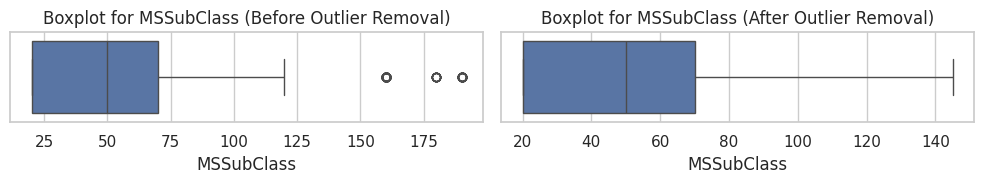

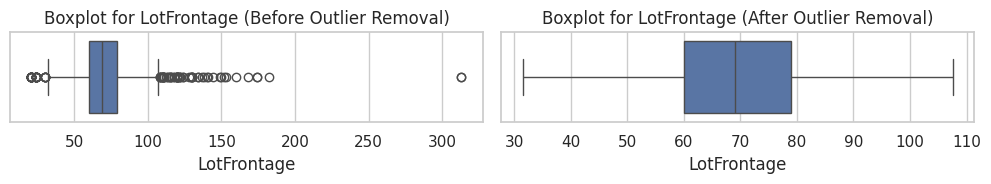

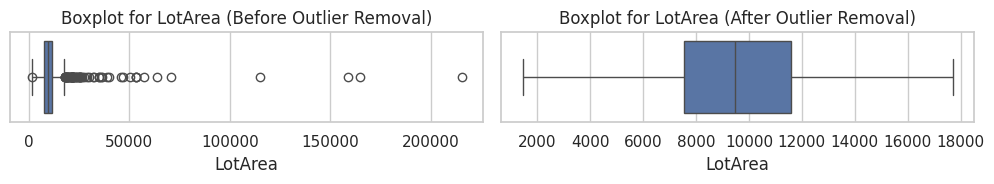

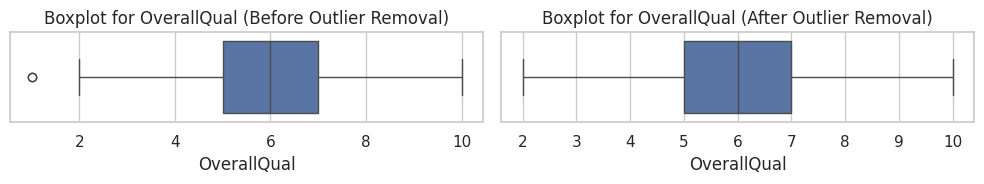

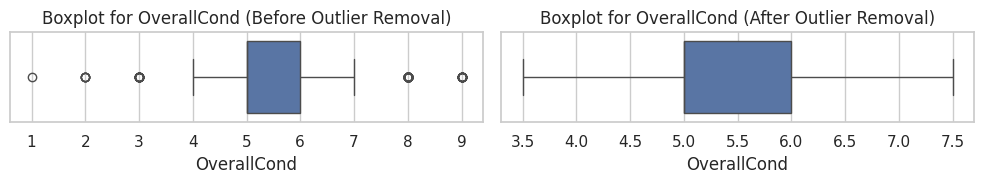

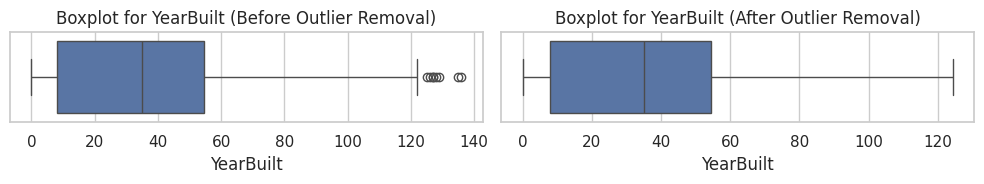

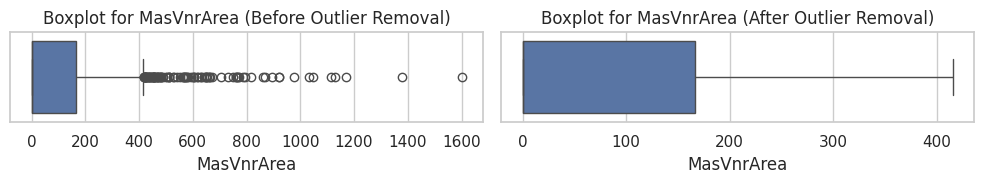

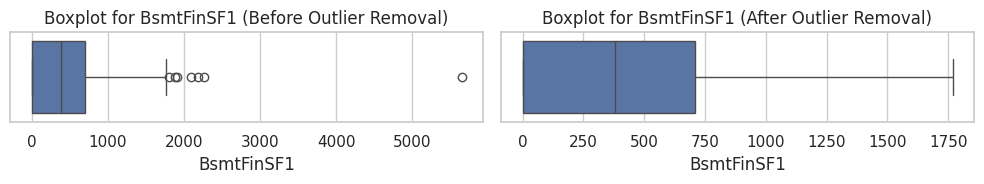

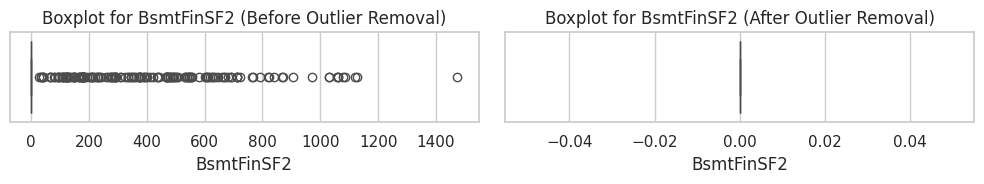

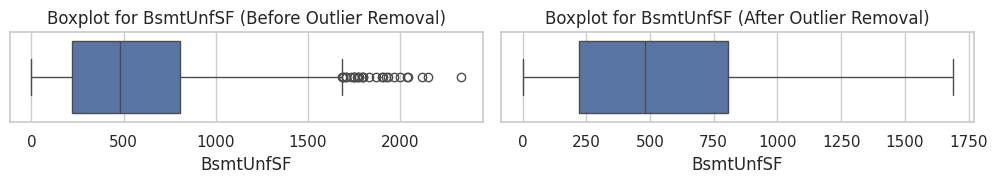

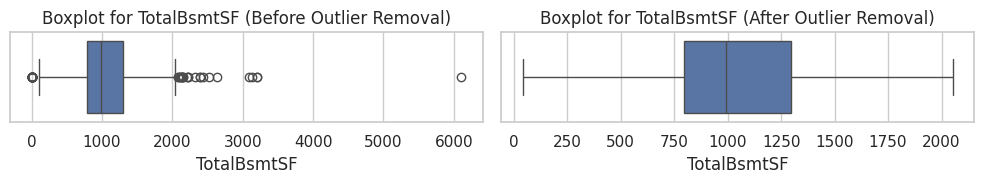

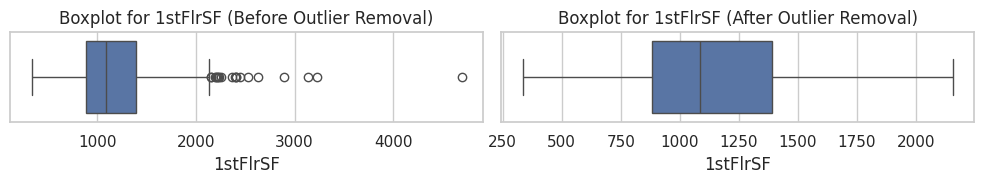

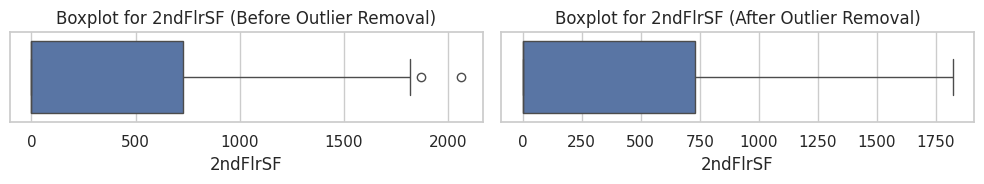

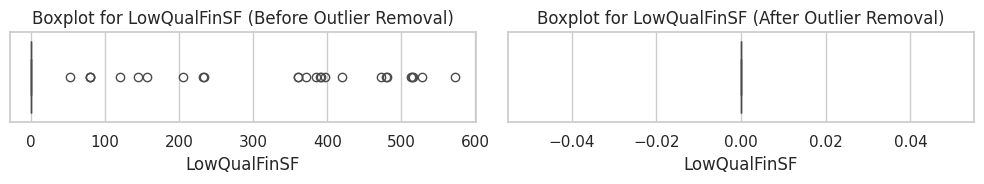

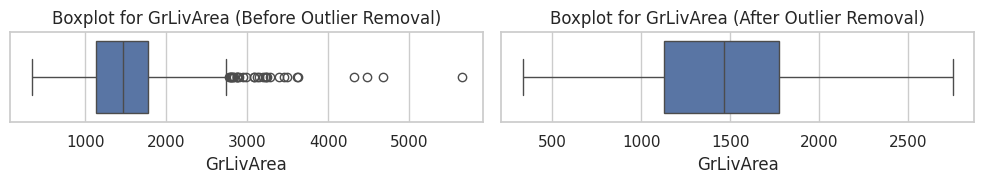

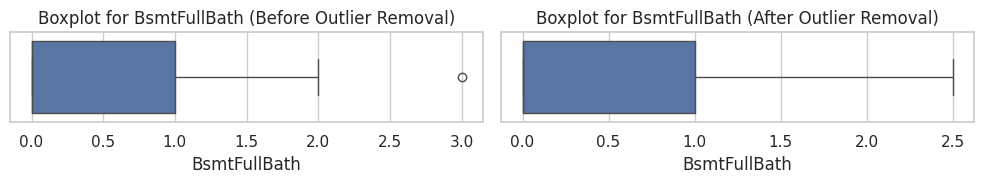

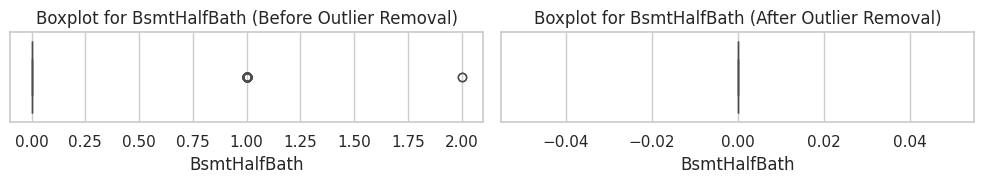

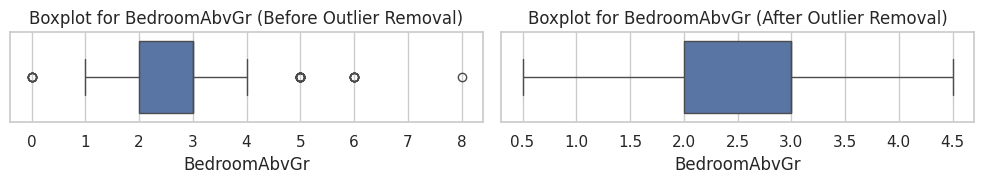

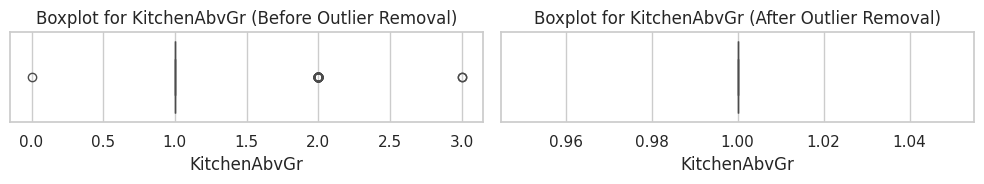

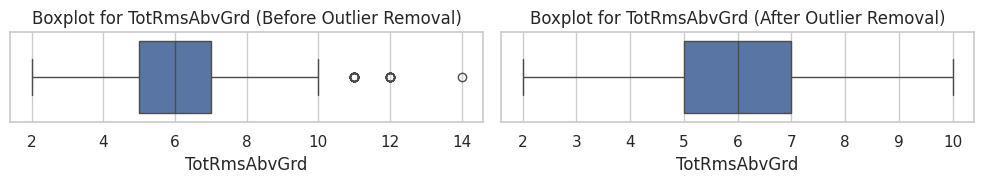

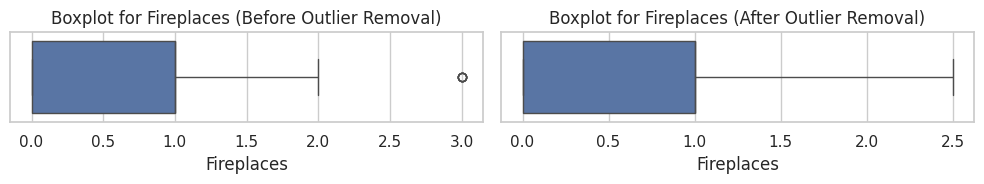

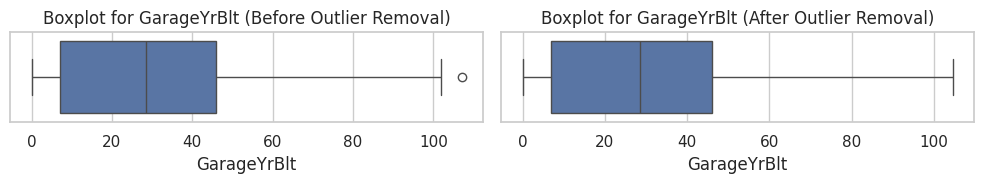

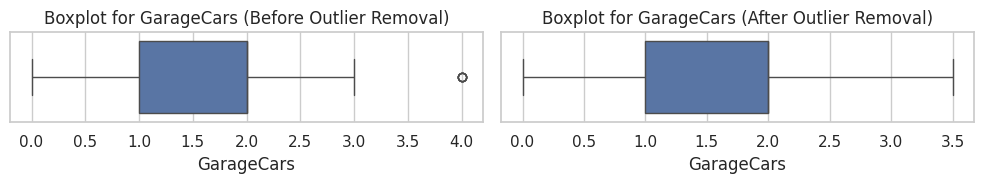

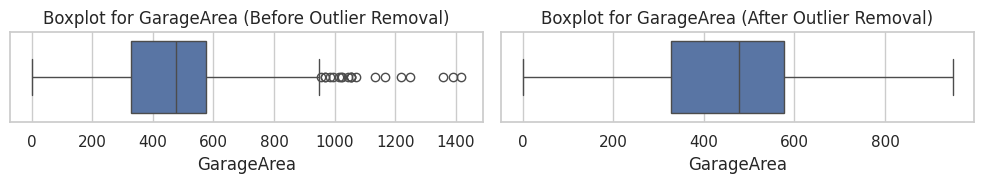

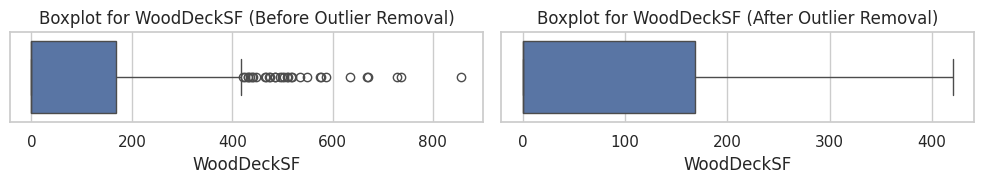

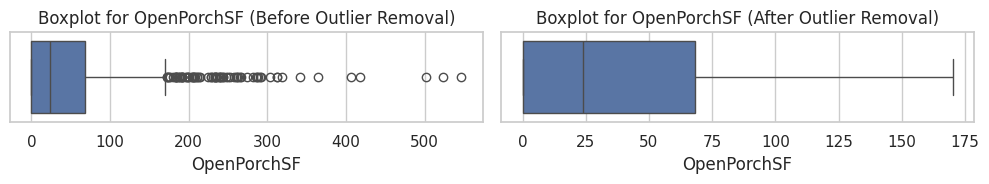

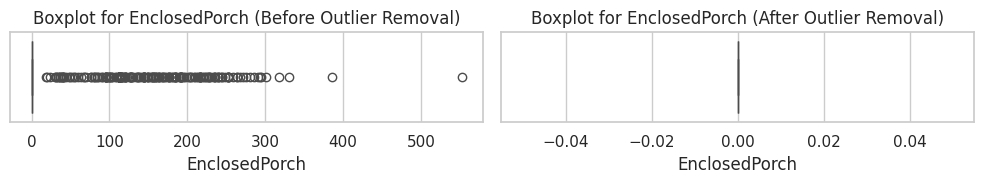

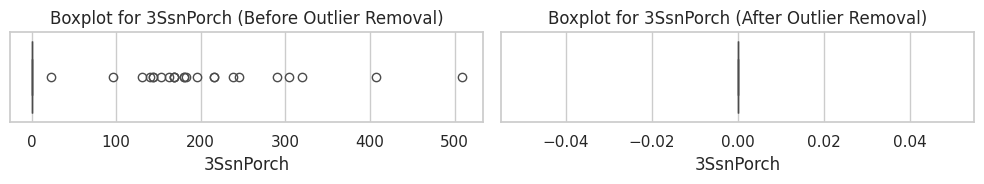

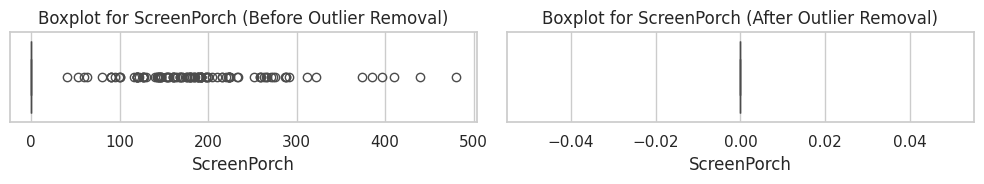

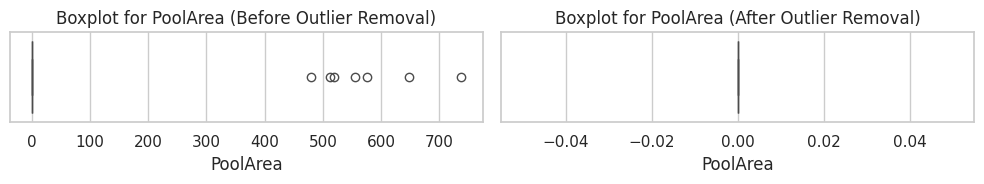

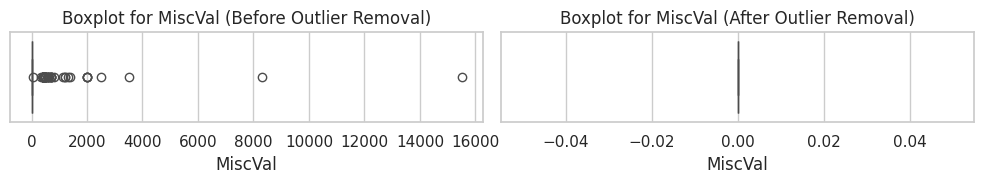

In [917]:
for col in outliers_df['Features']:
    if col != 'SalePrice':
        fig, axes = plt.subplots(1, 2, figsize=(10, 2))

        # boxplot before outlier removal
        sns.boxplot(housing_df[col], ax=axes[0], orient="h")
        axes[0].set_title(f"Boxplot for {col} (Before Outlier Removal)")

        # remove outliers
        replace_outlier_with_thresholds(housing_df, col)

        # boxplot after outlier removal
        sns.boxplot(housing_df[col], ax=axes[1], orient="h")
        axes[1].set_title(f"Boxplot for {col} (After Outlier Removal)")

        plt.tight_layout()
        plt.show()

### Visualizing & Analyzing Numerical Features
---

In [918]:
numerical_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Splitting Numerical continuous features and Numerical discrete features

In [919]:
numerical_continuous_vars = []
numerical_discrete_vars = []
for var in numerical_df:
    unique_values_count = housing_df[var].nunique()

    if unique_values_count >= len(housing_df) * 0.01:
       numerical_continuous_vars.append(var)
    else:
        numerical_discrete_vars.append(var)
        print("Unique values in {0}  : {1}".format(var, str(housing_df[var].unique())))
print("Numerical continuous features:",numerical_continuous_vars)
print("Numerical discrete features:",numerical_discrete_vars)

Unique values in MSSubClass  : [ 60  20  70  50 145  45  90 120  30  85  80  75  40]
Unique values in OverallQual  : [ 7  6  8  5  9  4 10  3  2]
Unique values in OverallCond  : [5.  7.5 6.  7.  4.  3.5]
Unique values in BsmtFinSF2  : [0]
Unique values in LowQualFinSF  : [0]
Unique values in BsmtFullBath  : [1.  0.  2.  2.5]
Unique values in BsmtHalfBath  : [0]
Unique values in FullBath  : [2 1 3 0]
Unique values in HalfBath  : [1 0 2]
Unique values in BedroomAbvGr  : [3.  4.  1.  2.  0.5 4.5]
Unique values in KitchenAbvGr  : [1]
Unique values in TotRmsAbvGrd  : [ 8  6  7  9  5 10  4  3  2]
Unique values in Fireplaces  : [0.  1.  2.  2.5]
Unique values in GarageCars  : [2.  3.  1.  0.  3.5]
Unique values in EnclosedPorch  : [0]
Unique values in 3SsnPorch  : [0]
Unique values in ScreenPorch  : [0]
Unique values in PoolArea  : [0]
Unique values in MiscVal  : [0]
Unique values in MoSold  : [ 2  5  9 12 10  8 11  4  1  7  3  6]
Unique values in YrSold  : [2008 2007 2006 2009 2010]
Numerica

#### Data Visualization of Numerical Continuous Features

- scatterplot for comparison with target feature SalePrice
- distplot for checking distribution

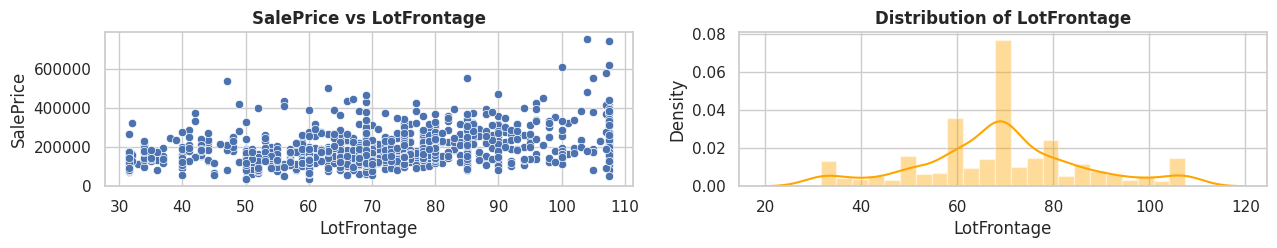

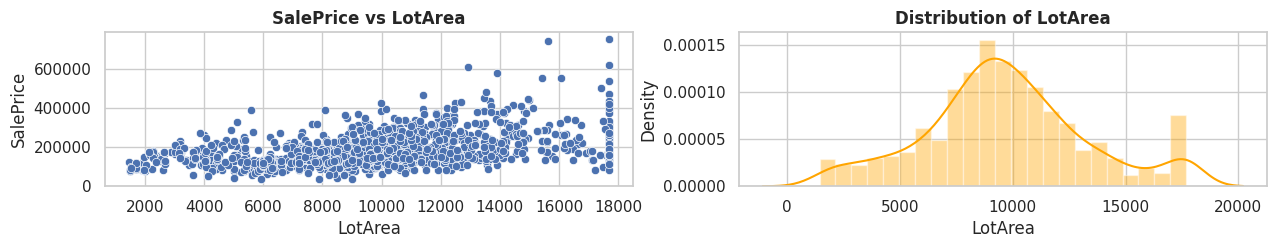

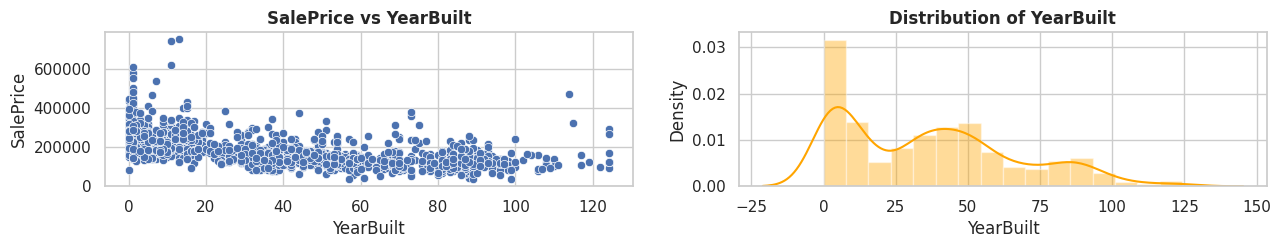

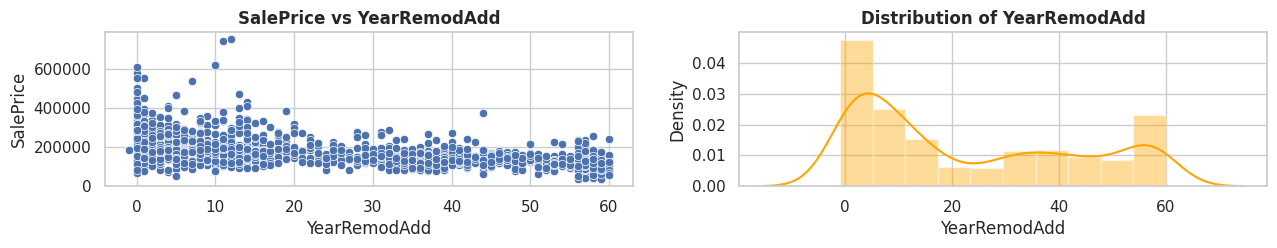

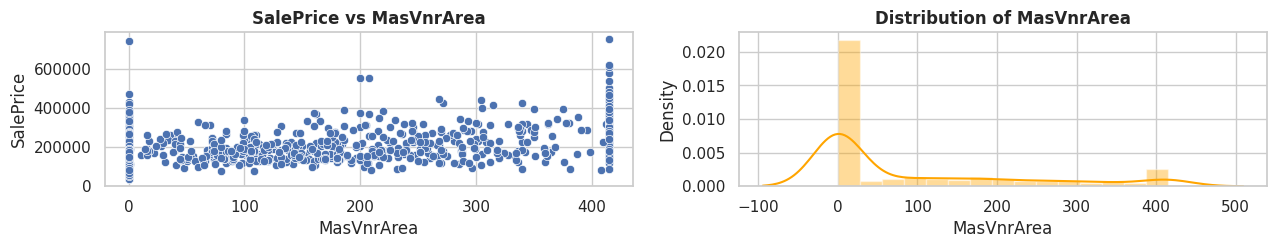

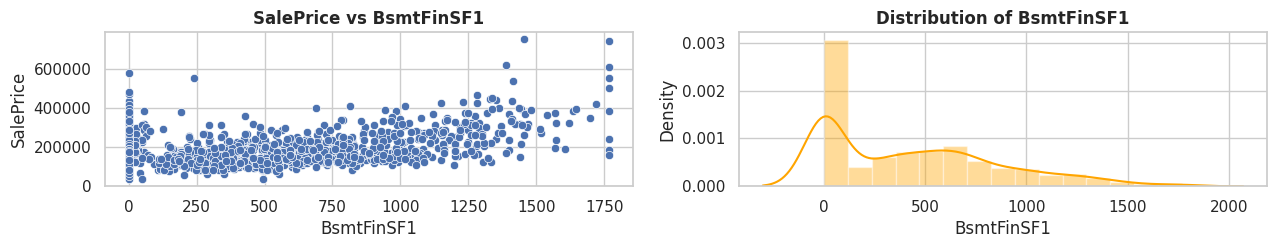

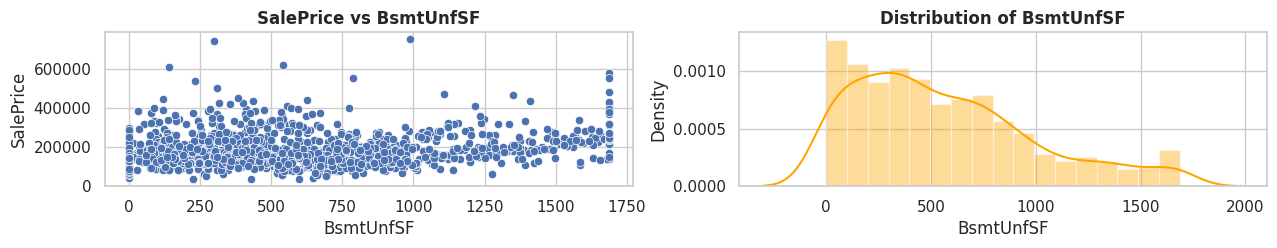

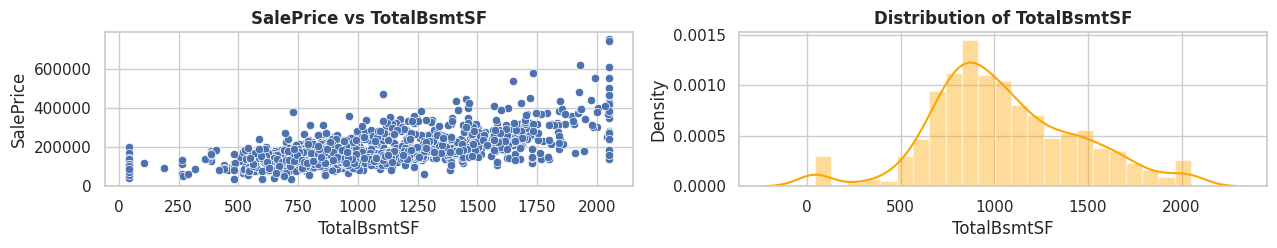

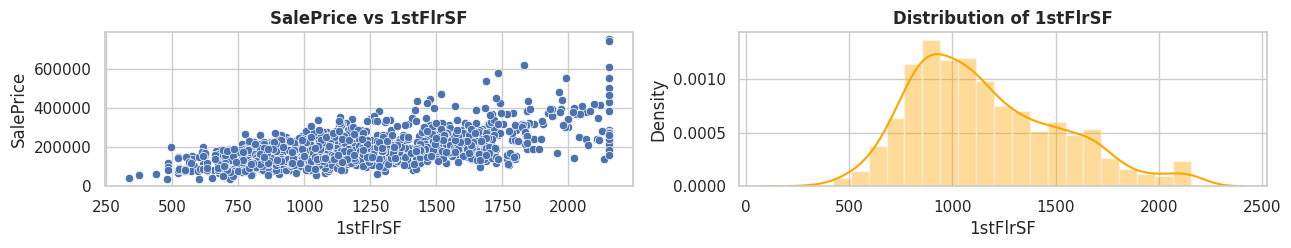

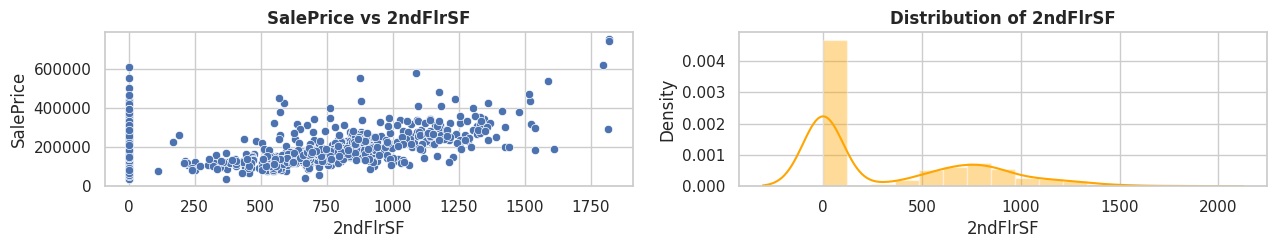

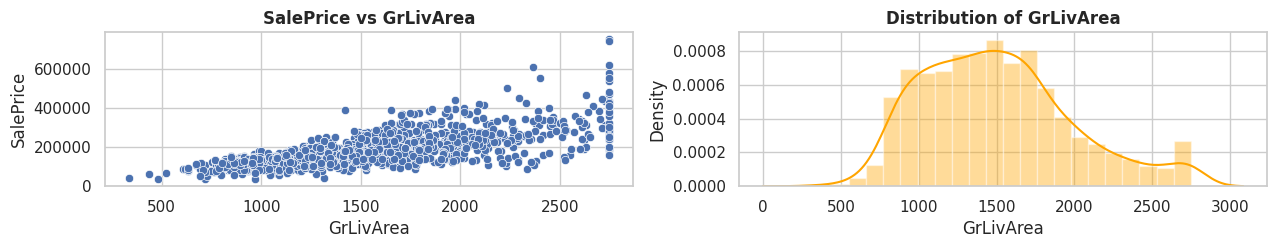

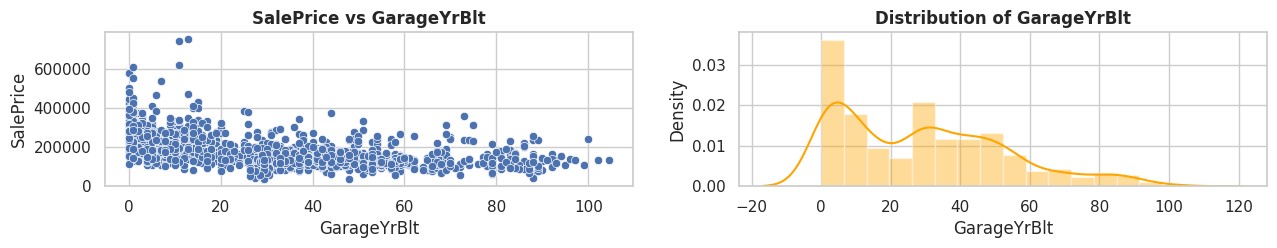

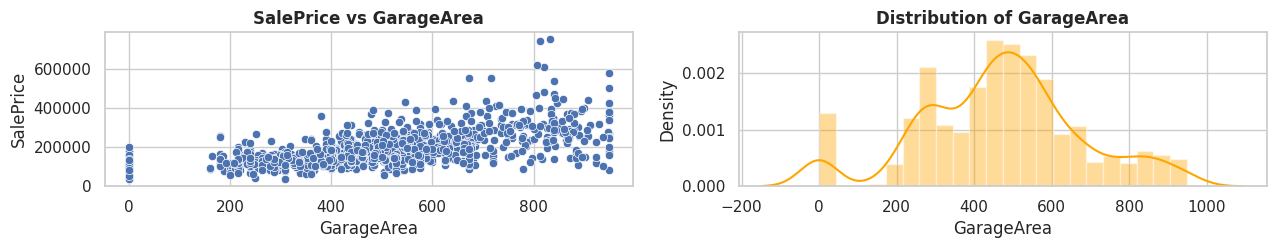

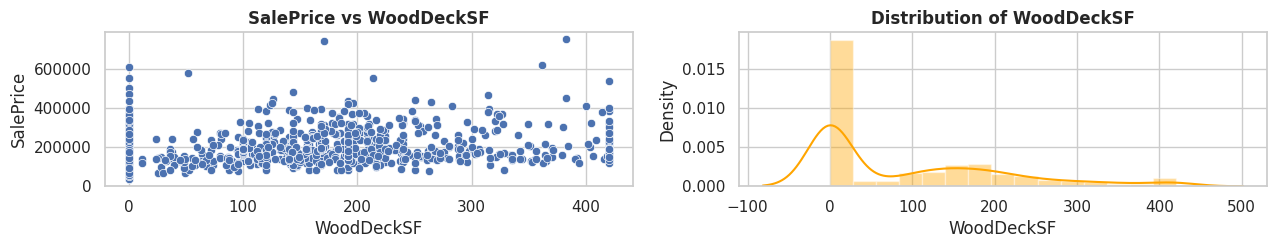

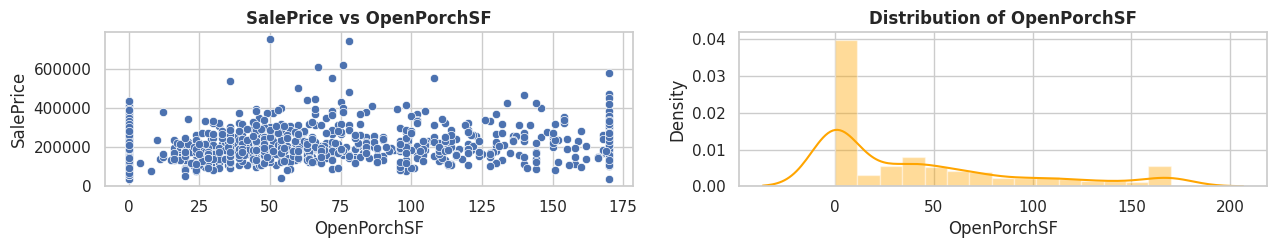

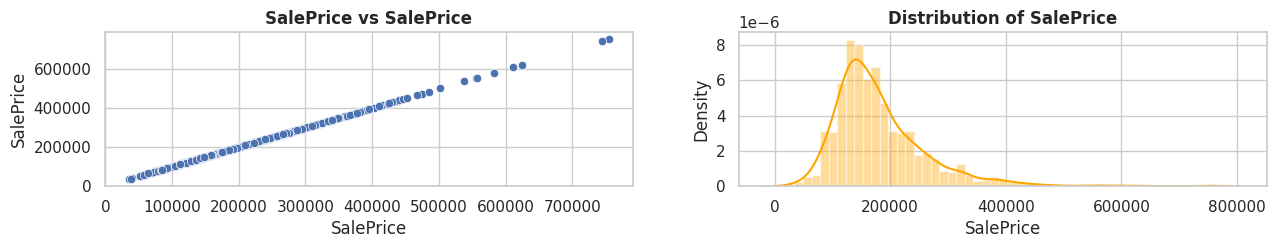

In [920]:
for i, col in enumerate(numerical_continuous_vars):
    plt.figure(figsize=(15,2))

    plt.subplot(1,2,1)
    plt.title('SalePrice vs ' + col, fontdict={'fontsize': 12, 'fontweight': 'bold'})
    sns.scatterplot(x=housing_df[col], y=housing_df['SalePrice'])

    plt.subplot(1,2,2)
    plt.title('Distribution of ' + col, fontdict={'fontsize': 12, 'fontweight': 'bold'})
    sns.distplot(housing_df[col], color='orange')
    plt.show()

**Observation:**

> * LotFrontage, LotArea, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea : Showing positive correlation with SalePrice.
* GarageYrBlt: For most the realty properties Garage is built within last 20 years, SalePrice is more recently built garages
* YearBuilt: Increase in Property Age shows a decreasing saleprice trend i.e newer the property, high is the value.
* YearRemodAdd: Recently remodelled houses (lower value of YearRemodAdd) have higher SalePrice

> SalePrice distribution is highly right skewed. We need to address that before model building.


#### Data Visualization of Numerical Discrete Features

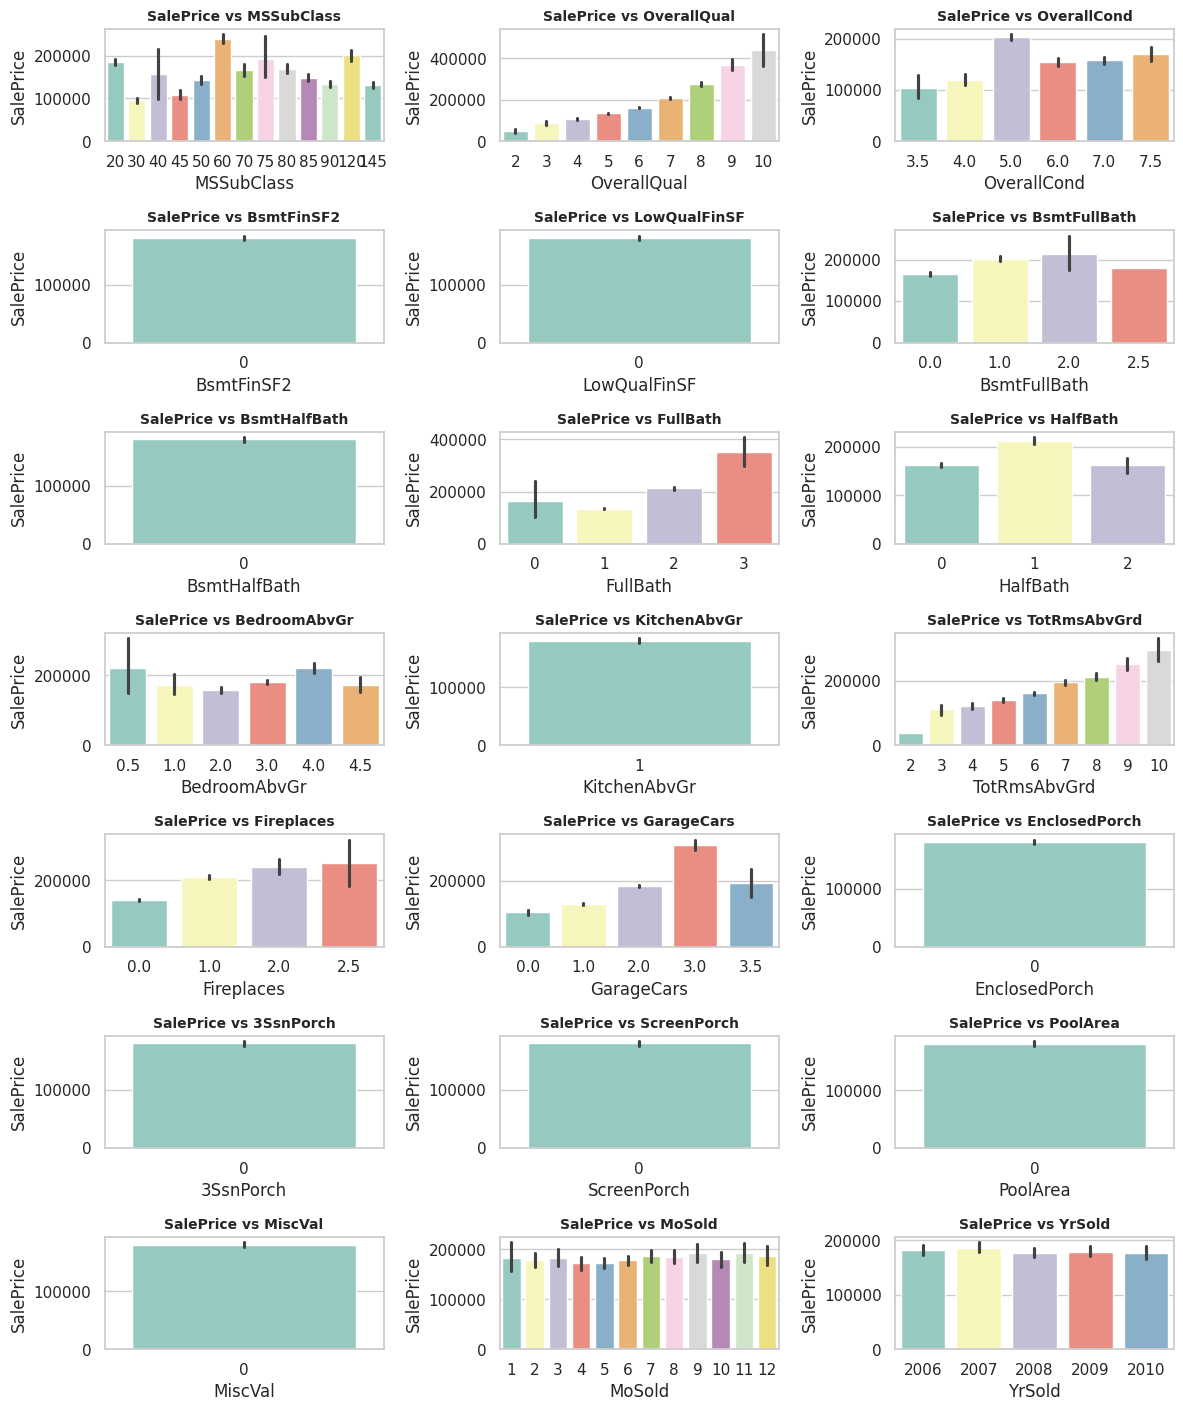

In [921]:
fig=plt.subplots(figsize=(12, 50))

for i, col in enumerate(numerical_discrete_vars):
    plt.subplot(25,3, i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.barplot(x=housing_df[col], y=housing_df['SalePrice'],  palette='Set3')
    plt.title('SalePrice vs ' + col, fontdict={'fontsize': 10, 'fontweight': 'bold'})
    plt.tight_layout()

**Observations:**

* OverallQual: Higher ratings are associated with higher SalePrices.
* OverallCond: SalePrices peak at a rating of 5.
* MoSold and YrSold: SalePrices do not show a strong trend based on the transaction month or year.
* FullBath = 3 and HalfBath = 1 correspond to the highest SalePrices.
* GarageCars = 3 correspond to the highest SalePrices.
* TotRmsAbvGrd: More rooms above grade correlate with higher SalePrices.


* BsmtFinSF2, BsmtHalfBath, KitchenAbvGr, LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal has single value and can be dropped.

#### Correlations Heatmap among numerical variables

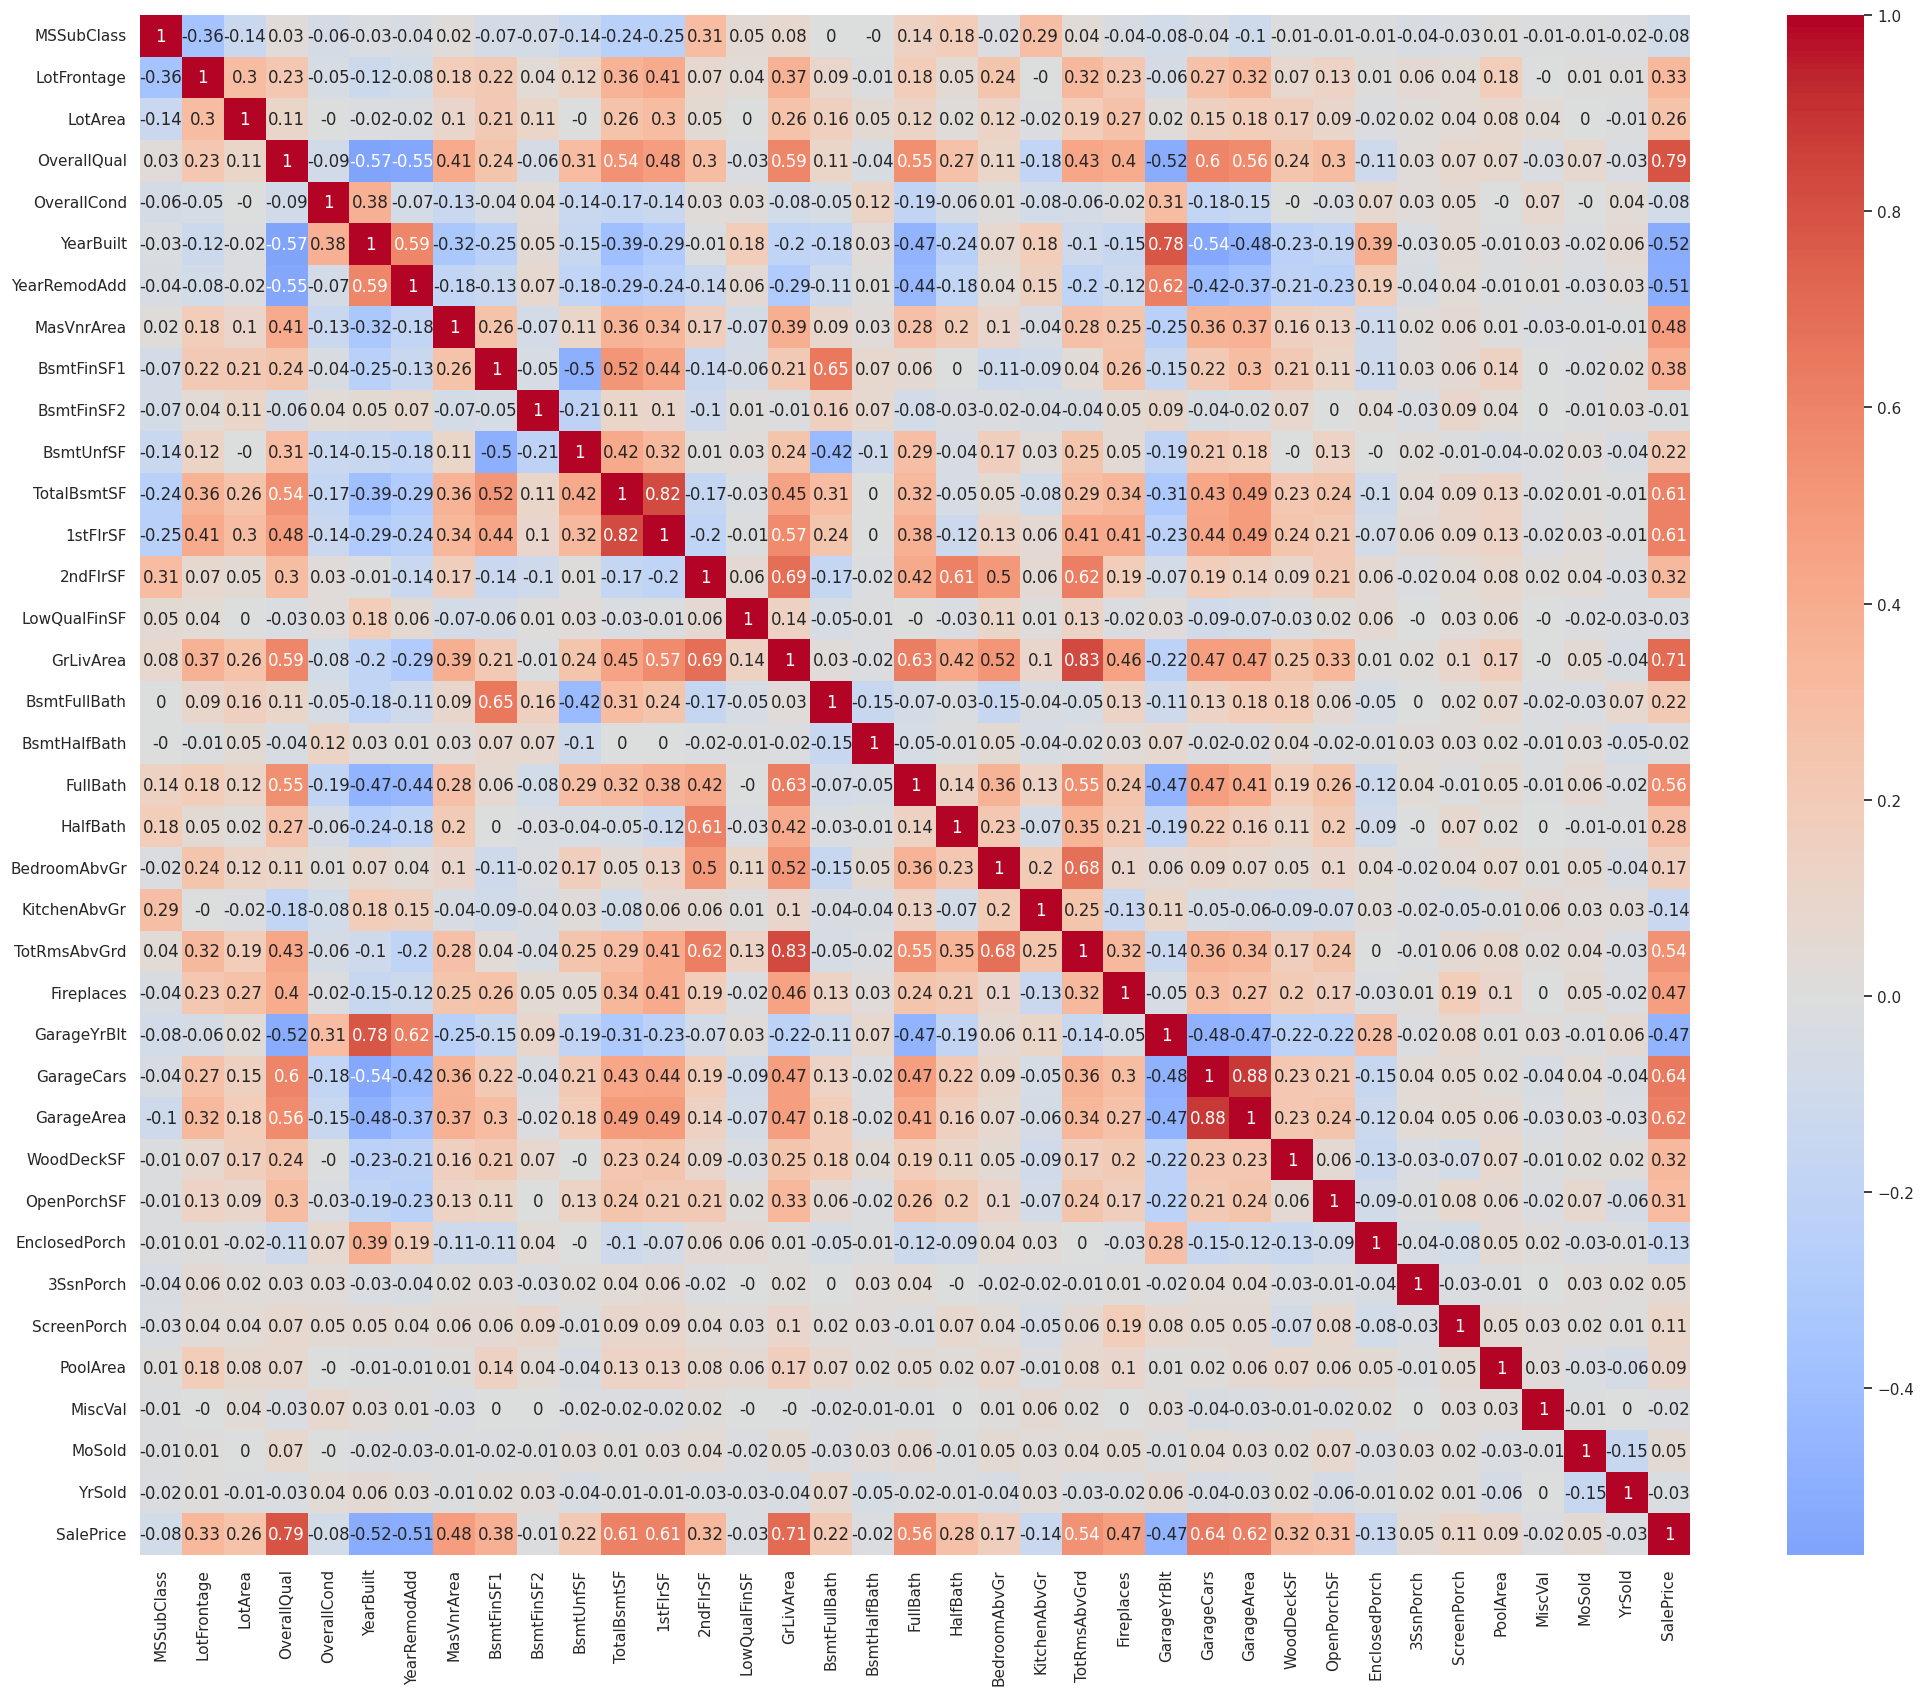

In [922]:
# Plot heatmap to detect correlations among numerical variables
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(numerical_df.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()


**Observation:**

Target variable SalePrice is highly correlated with GrLivArea, GarageCars and GarageArea
As there is multicollinearity among predictors in the data, it would be good to use advance regression technique.

Also, many other columns are highly correlated with each other, so will drop one of them
- GarageCars and GarageArea
- GarageYrBlt and YearBuilt
- TotRmsAbvGrd and GrLivArea
- TotalBsmtSF and 1stflrSF

#### Dropping Less Significant Features

**Observation:**
OverallQual, GrLivArea ,GarageArea, 1st Flr SF, Full Bath, Year Built have greater influence on target variable Sale Price

Also from the above count plots, we can spot some features with a consider amount of skewing in the data. We will analyze how much skewed the data exactly is, and then take action based on that after creation of dummies.

In [923]:
# Dropping single valued numerical featues
housing_df.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath', 'KitchenAbvGr','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)


In [924]:
# Dropping one in the pair has greater correlation
housing_df.drop(columns=['GarageYrBlt', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageCars'], axis=1, inplace=True)

In [925]:
print("DataFrame Shape after removing unnecessary columns: \n", housing_df.shape)

DataFrame Shape after removing unnecessary columns: 
 (1451, 66)


### Features Correlating with Target Variable


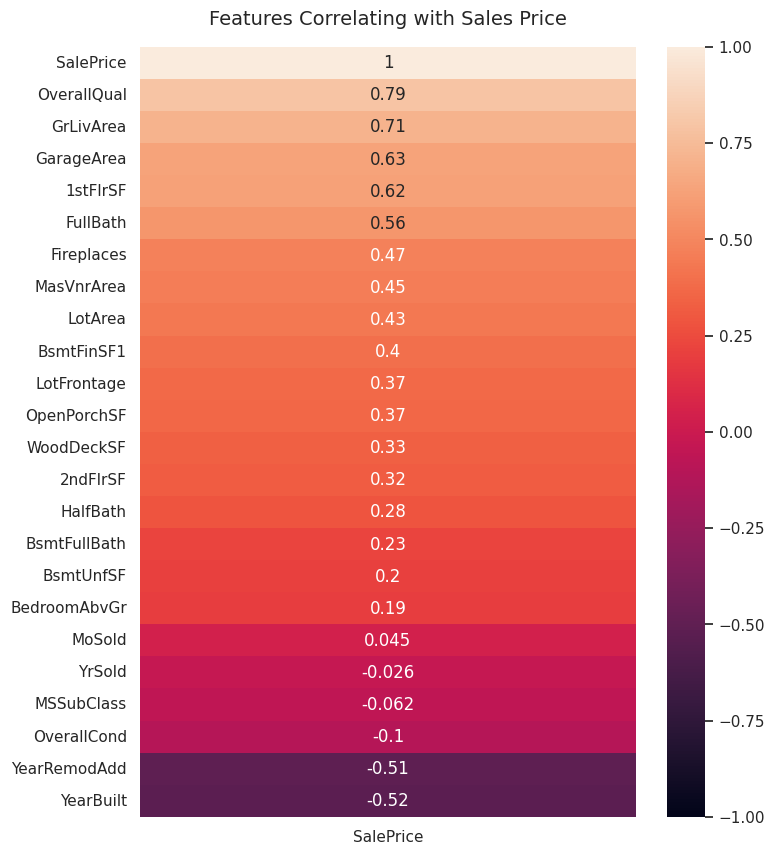

In [926]:
plt.figure(figsize=(8, 10))
heatmap_outputvar = sns.heatmap(housing_df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap_outputvar.set_title('Features Correlating with Sales Price', fontdict={'fontsize':14}, pad=16);

### Visualizing & Analyzing Categorical Features

In [927]:
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

#### Data Visualization of Categorical Features


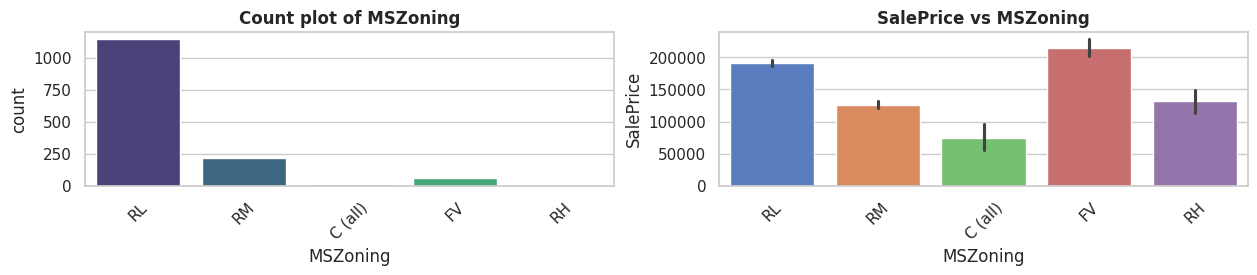

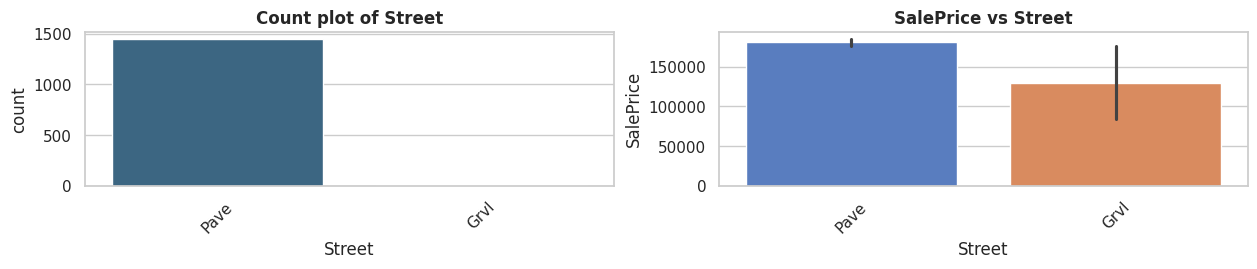

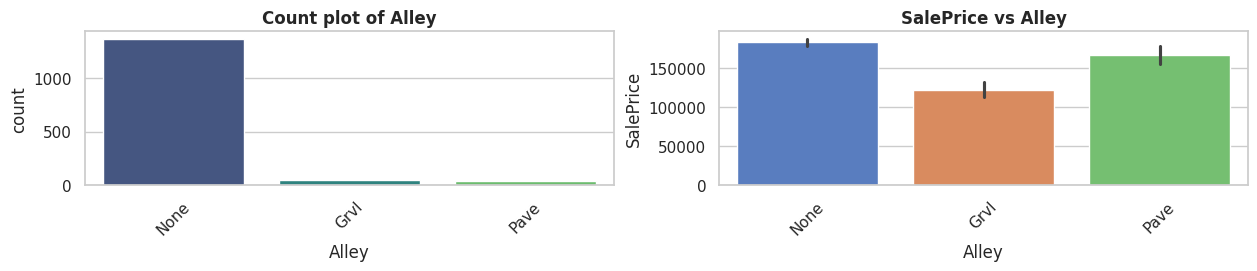

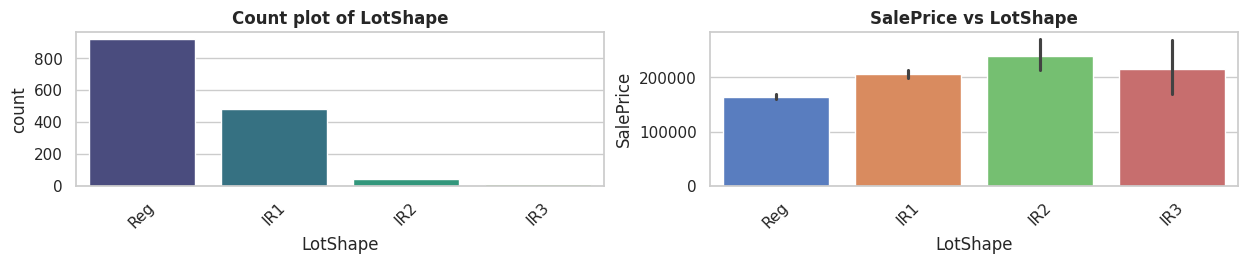

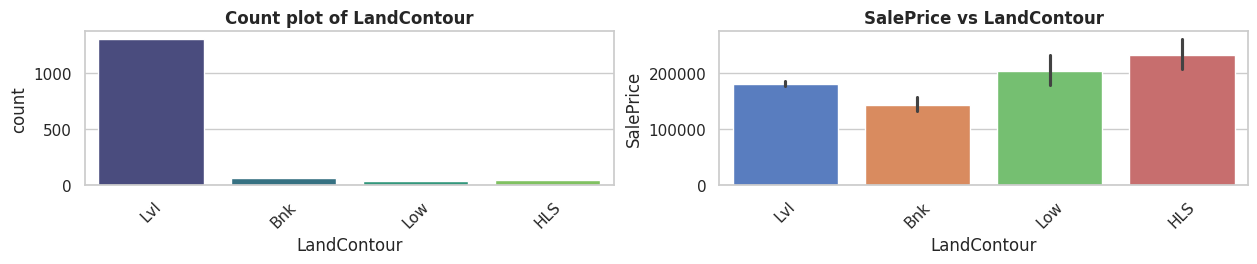

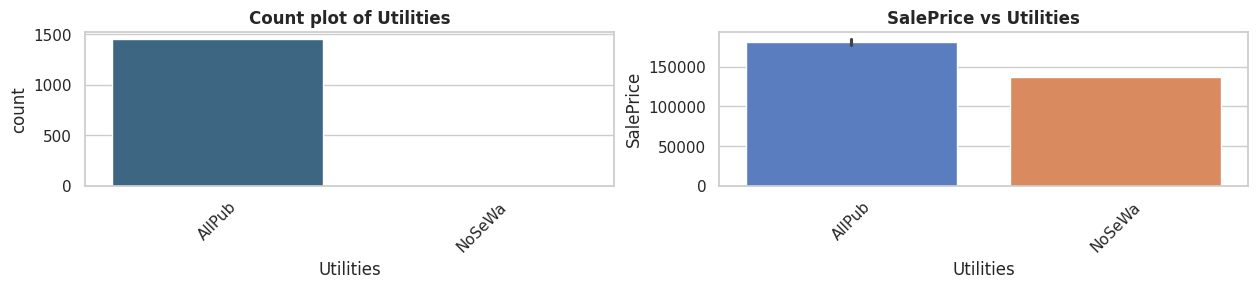

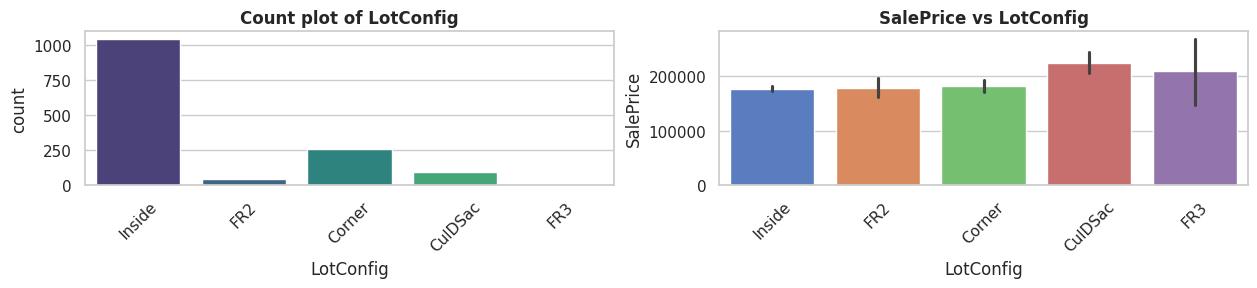

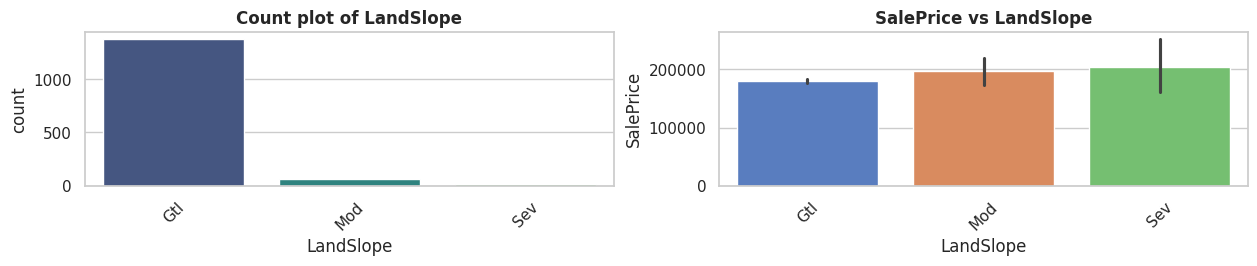

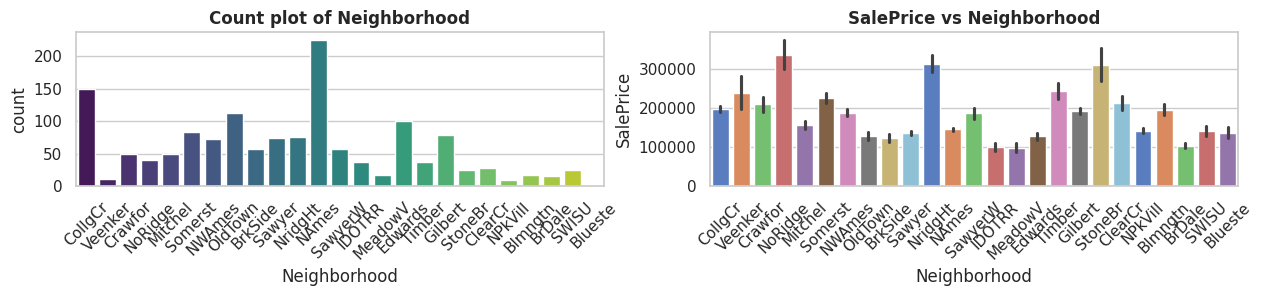

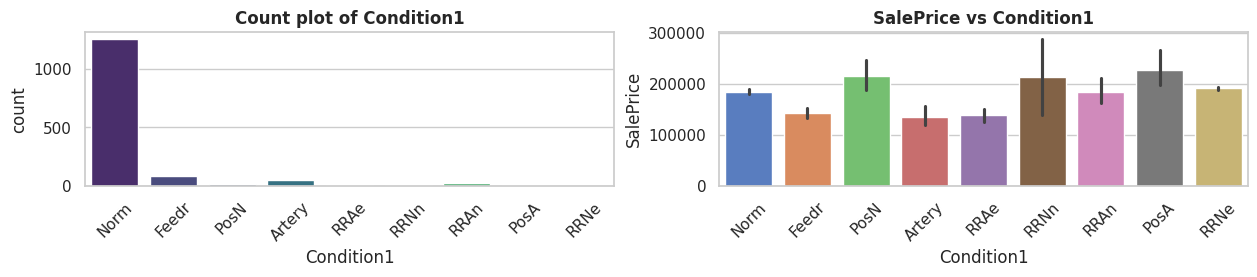

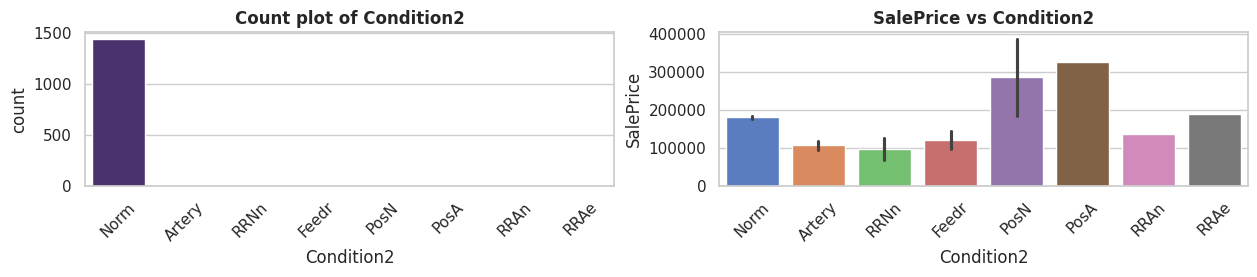

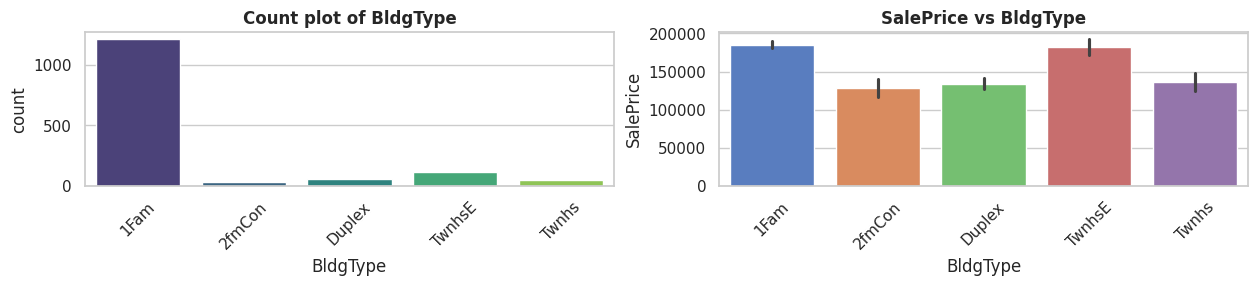

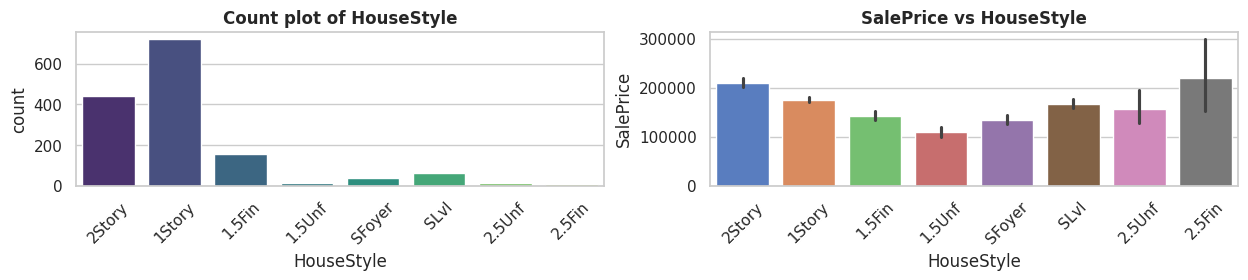

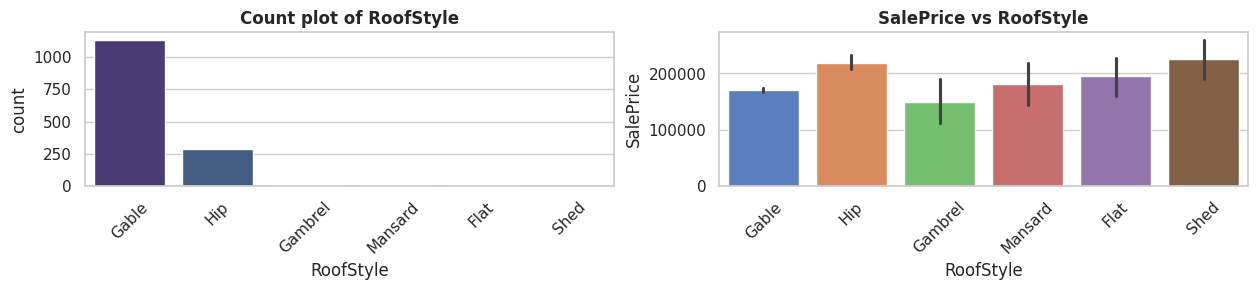

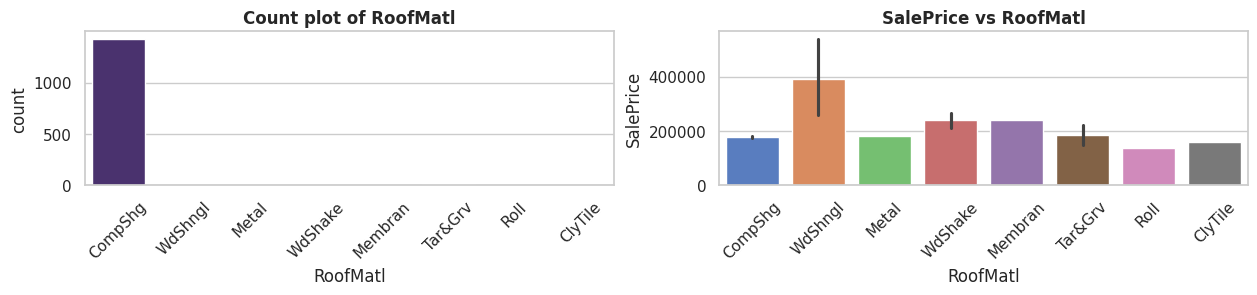

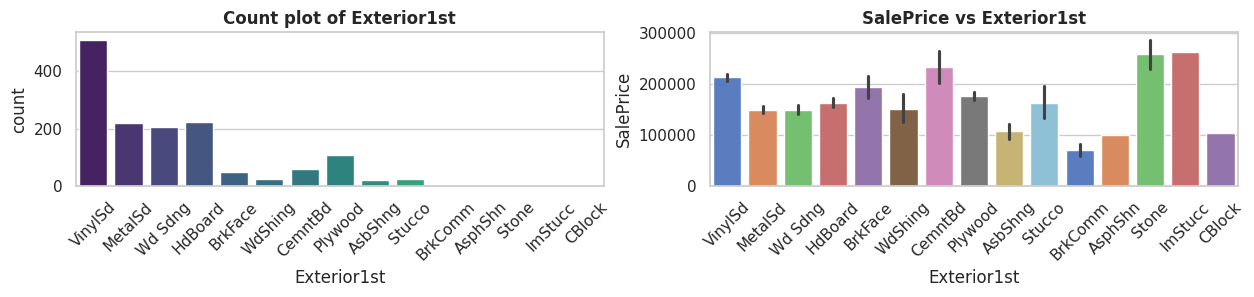

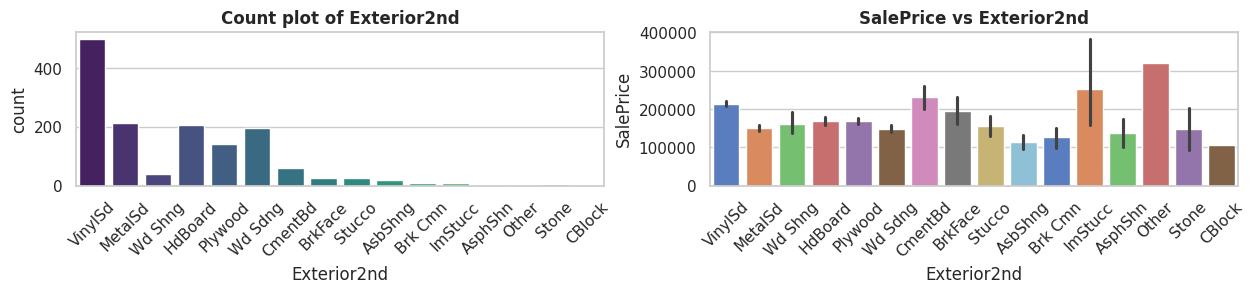

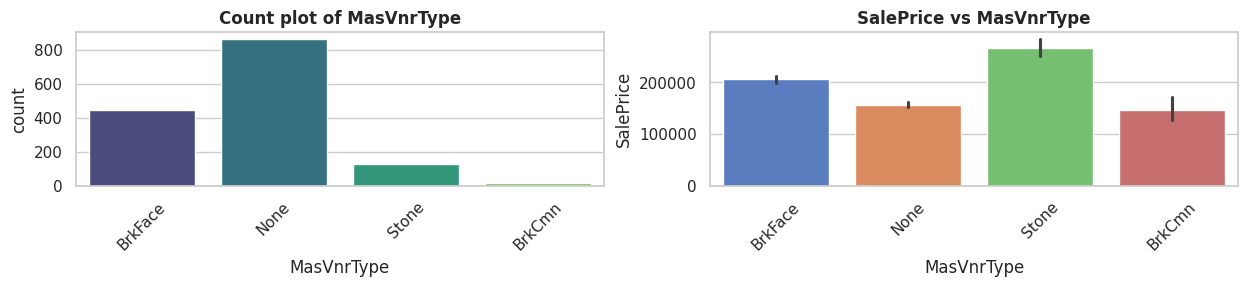

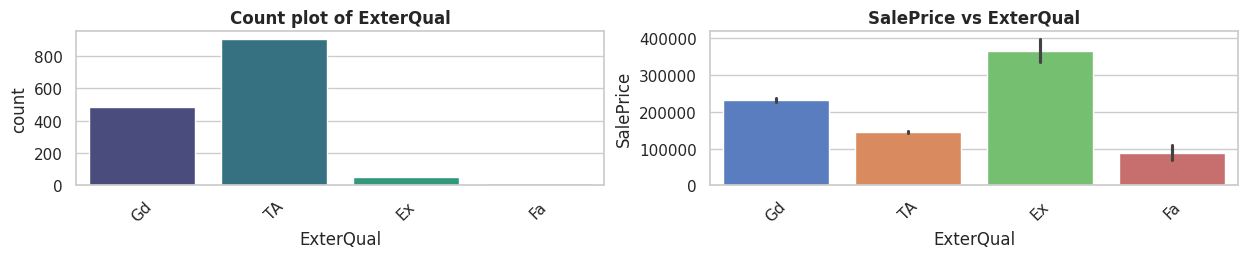

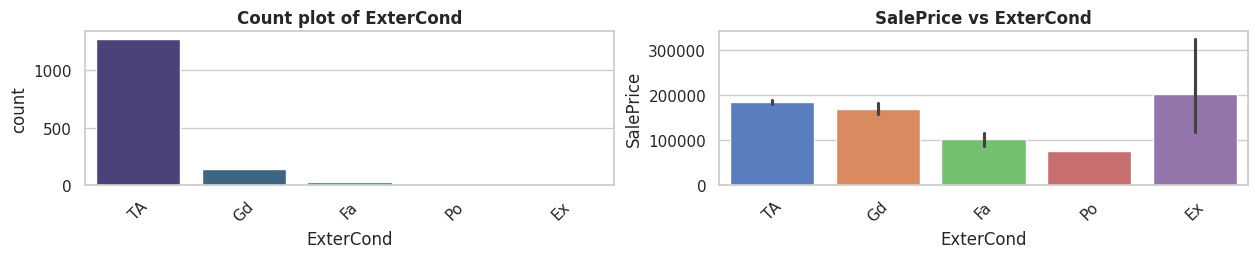

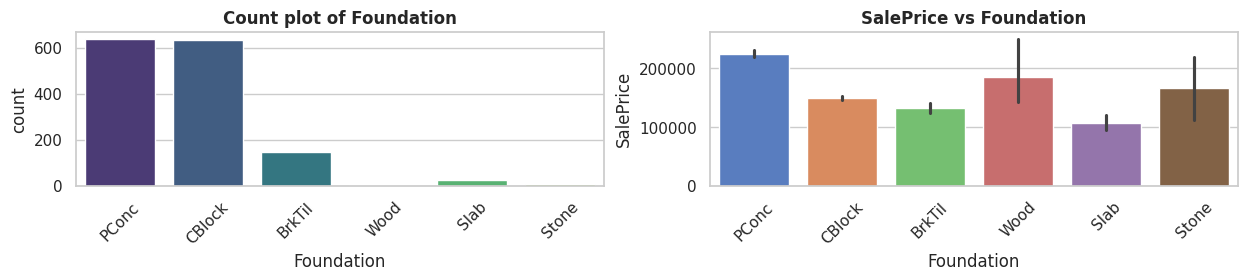

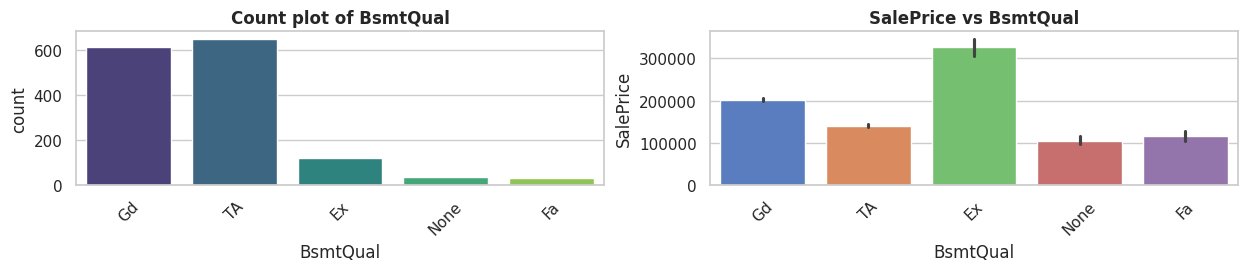

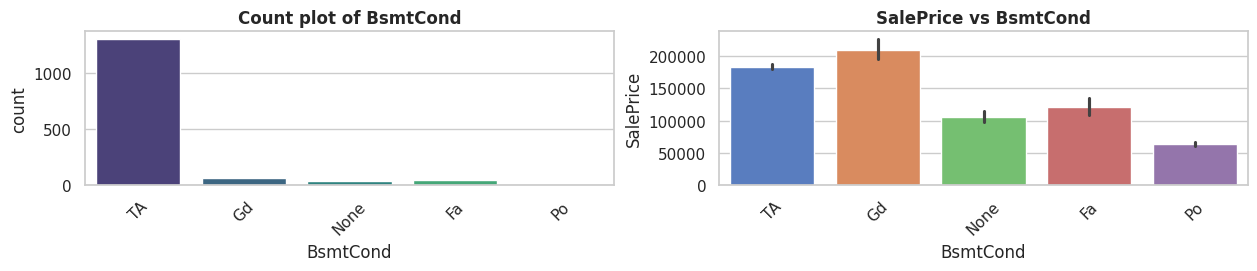

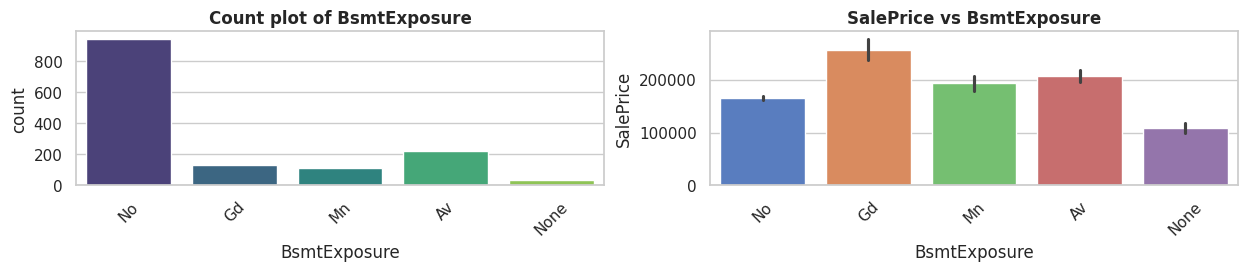

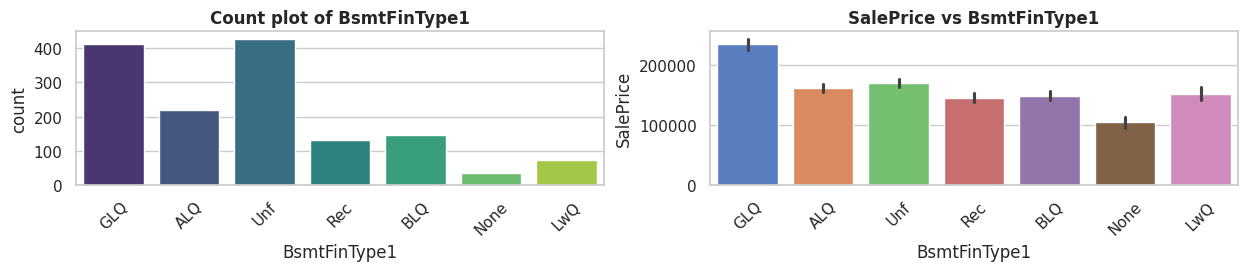

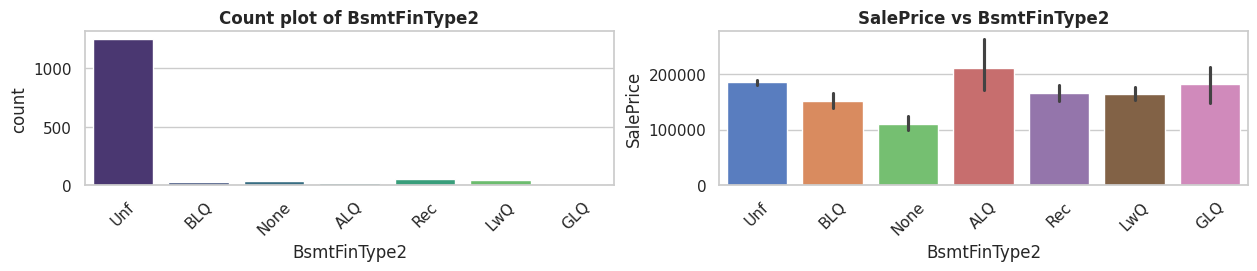

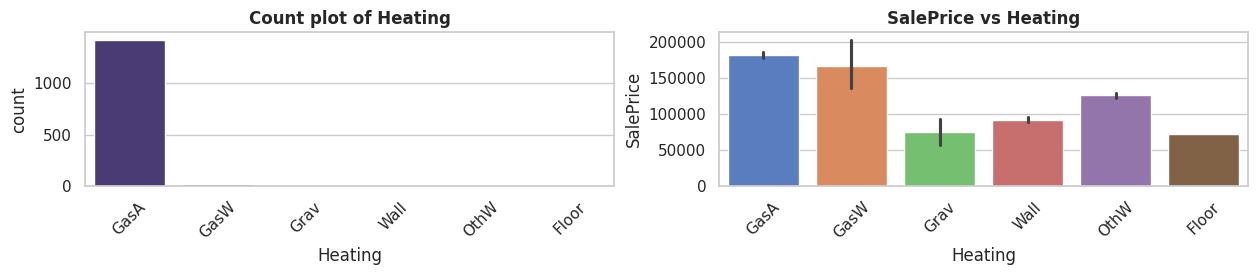

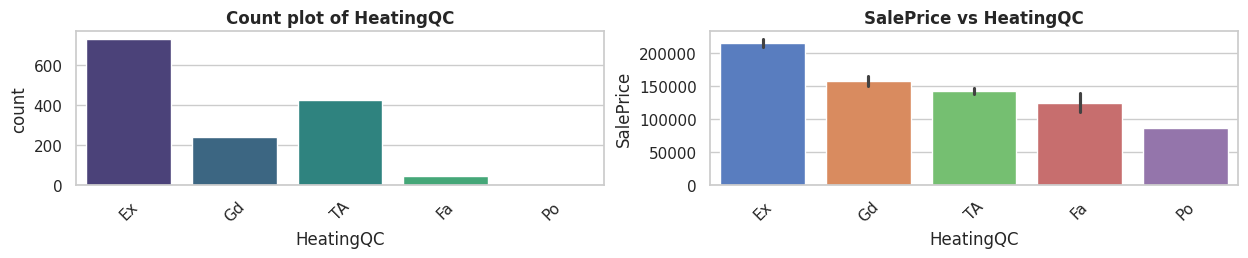

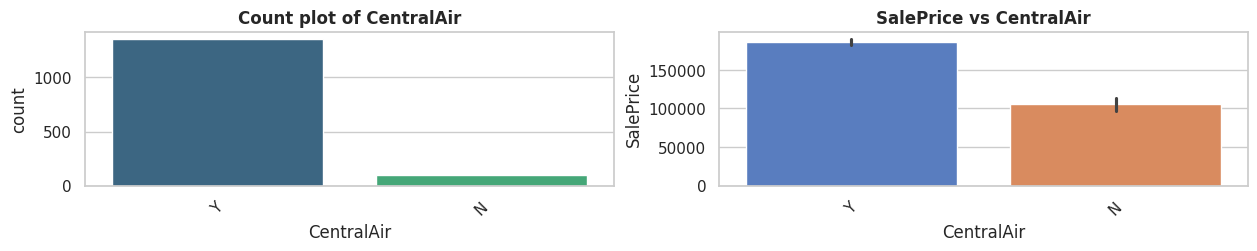

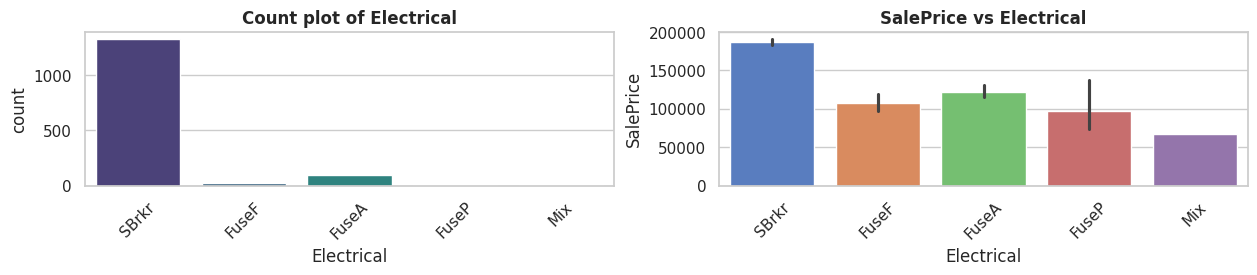

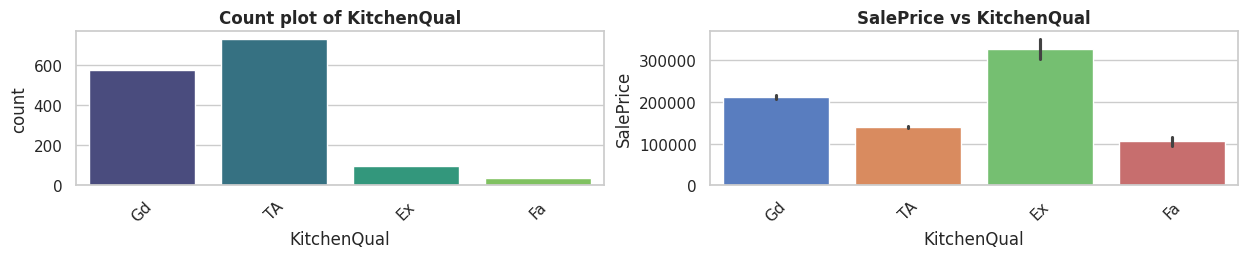

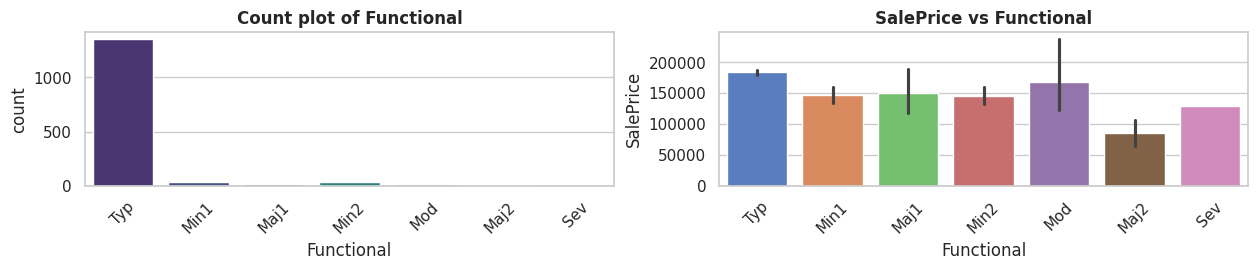

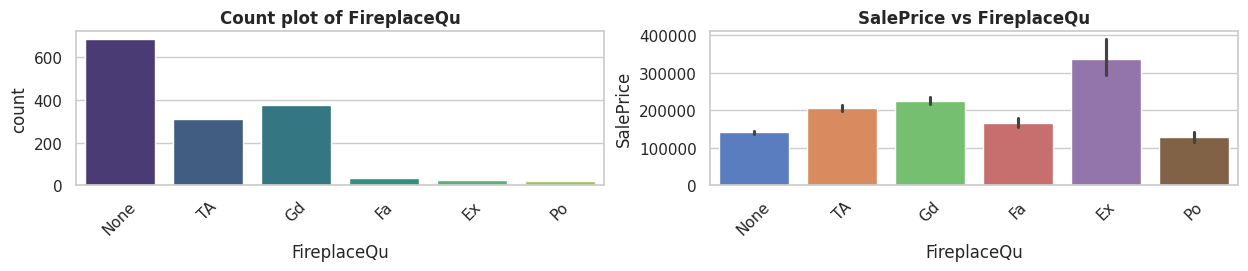

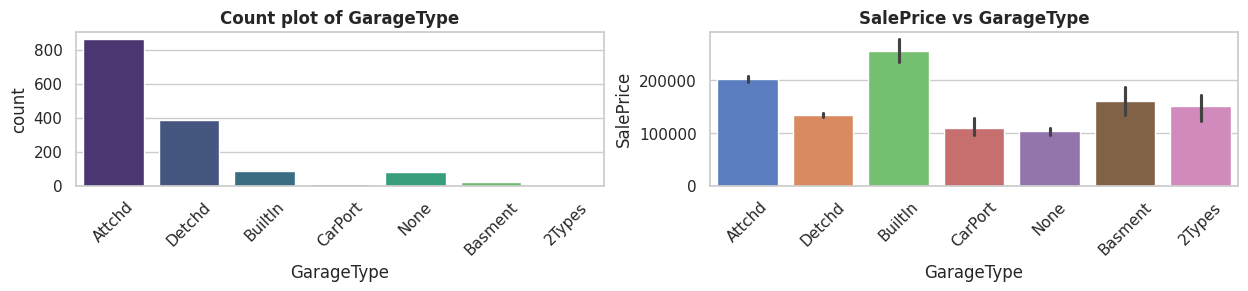

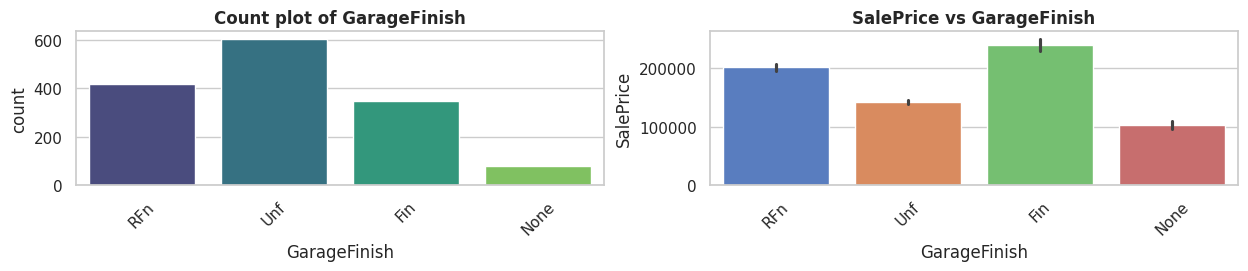

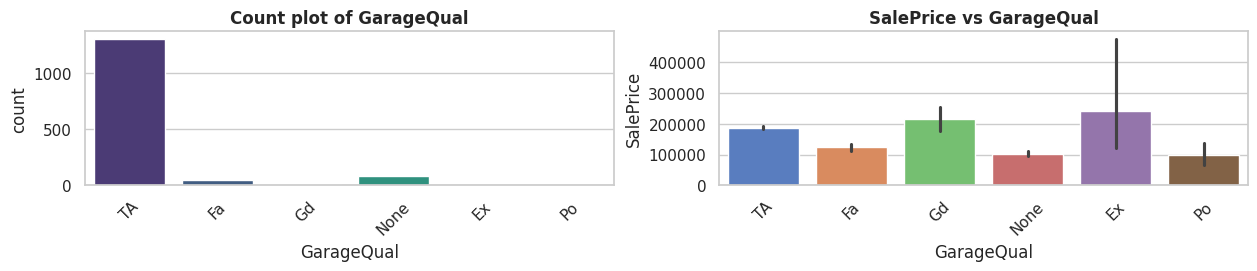

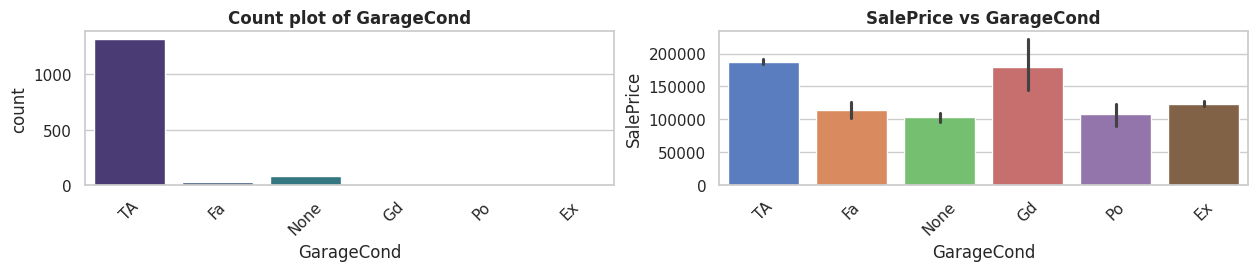

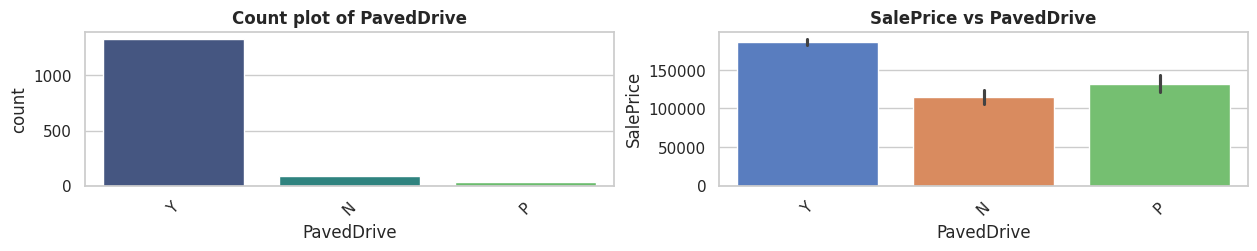

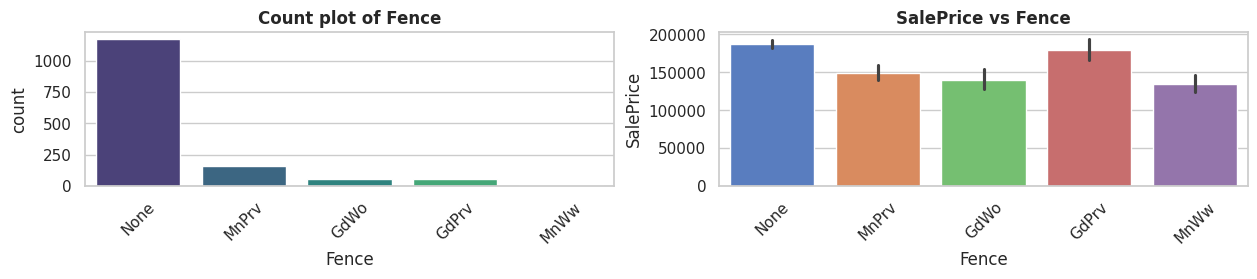

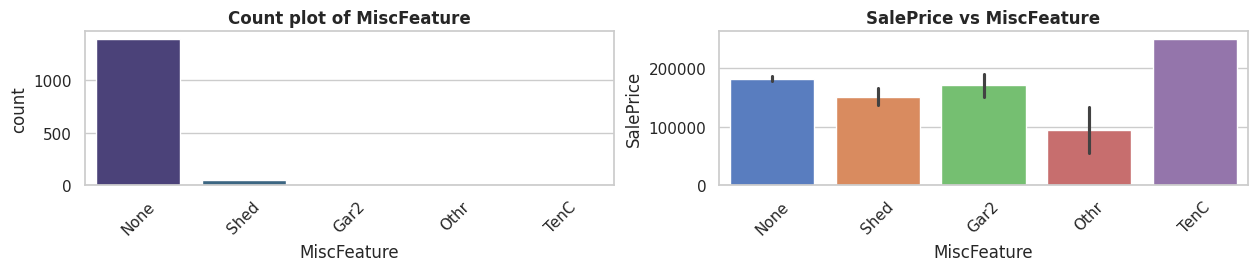

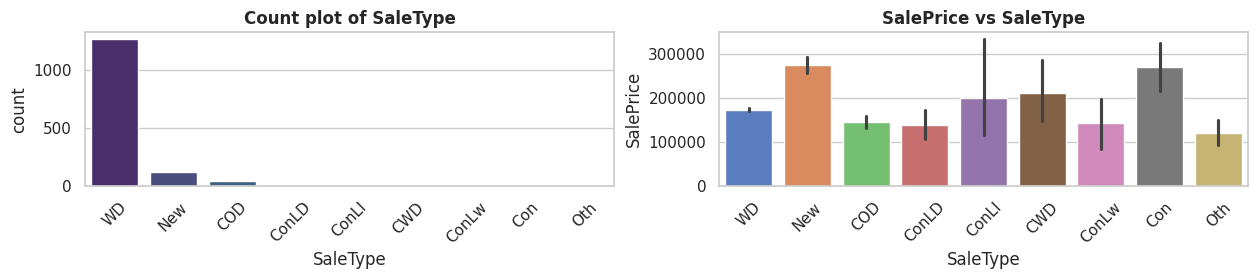

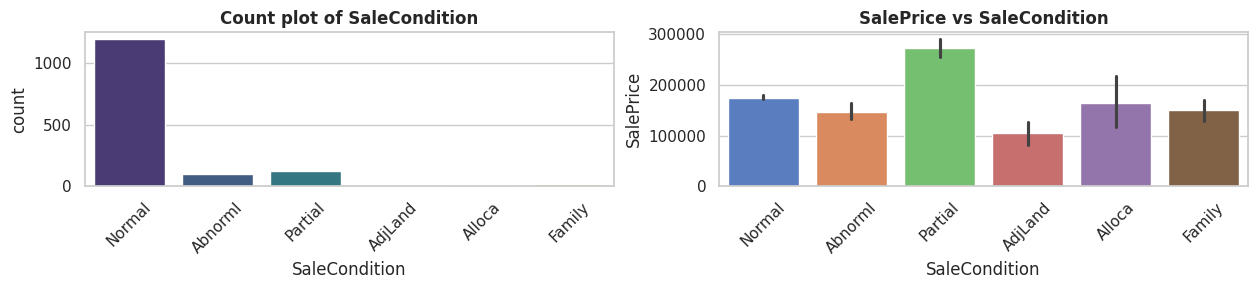

In [928]:
for i, col in enumerate(categorical_df.columns):
    plt.figure(figsize=(15,2))

    plt.subplot(1,2,1)
    sns.countplot(x=housing_df[col], palette='viridis')
    plt.title('Count plot of ' + col, fontdict={'fontsize': 12, 'fontweight': 'bold'})
    plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    sns.barplot(x=housing_df[col], y=housing_df['SalePrice'], palette='muted')
    plt.title('SalePrice vs ' + col, fontdict={'fontsize': 12, 'fontweight': 'bold'})
    plt.xticks(rotation=45)
    plt.show()

**Observations:**
* **MSZoning**: Floating Village Residential(FV) have the highest SalePrice followed by Residential Low Density(RL)
* **Steet** : "Paved" type of road surface or access to the property have the highest SalePrice.
* **LotShape** : Slightly irregular LotShape have the highest SalePrice
* **Utilities** : Most of the houses in the dataset have all the public utilities
* **HouseStyle** : 2 storied houses have the highest SalePrice
* **RoofMatl**: Roof material type Wood Shingles have the highest SalePrice
* **ExterQual**: Houses with Excellent quality of material on the exterior have the highest SalePrice
* **ExterCond** : Houses with Excellent condition of material on the exterior have the highest SalePrice
* **Heating, HeatingQC** : Houses having excellent heating quality and kitchen quality have the highest SalePrice

Some other notable observations are:

* The SalePrice range is most significant for houses with average fireplace quality.
* SalePrices peak when the garage is finished, contributing to the highest values.
* The widest range of SalePrices is observed in houses with typical or average garage quality and condition.
* There are limited houses with an excellent garage condition.
* Houses featuring an excellent quality basement achieve the highest SalePrices.
* Housing units with well-designed living quarters (BsmtFinType1=GLQ) exhibit the highest SalePrices.
* A considerable number of houses either have an unfinished basement or no basement (labeled as None).

#### Data Preparation
---

To reduce dimensionality of the dataset, we will use 2 differnet types of encoding technique for Catagorical features.

In [929]:
len(categorical_df.columns)

42

##### Label Encoding for Ordered Categorical Features

Below Ordered Features to be label encoded

'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual',
'GarageCond', 'CentralAir'

In [930]:
housing_df['LotShape'] = housing_df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_df['Utilities'] = housing_df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing_df['LandSlope'] = housing_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_df['HouseStyle'] = housing_df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing_df['ExterQual'] = housing_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['ExterCond'] = housing_df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['BsmtQual'] = housing_df['BsmtQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtCond'] = housing_df['BsmtCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['HeatingQC'] = housing_df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['CentralAir'] = housing_df['CentralAir'].map({'N':0,'Y':1})
housing_df['KitchenQual'] = housing_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['GarageFinish'] = housing_df['GarageFinish'].map({'None':0,'Unf':1,'RFn':2,'Fin':3})
housing_df['GarageQual'] = housing_df['GarageQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['GarageCond'] = housing_df['GarageCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['Functional'] = housing_df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

housing_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley  LotShape  \
0          60       RL         65.0   8450.0   Pave  None         3   
1          20       RL         80.0   9600.0   Pave  None         3   
2          60       RL         68.0  11250.0   Pave  None         0   
3          70       RL         60.0   9550.0   Pave  None         0   
4          60       RL         84.0  14260.0   Pave  None         0   

  LandContour  Utilities LotConfig  LandSlope Neighborhood Condition1  \
0         Lvl          3    Inside          0      CollgCr       Norm   
1         Lvl          3       FR2          0      Veenker      Feedr   
2         Lvl          3    Inside          0      CollgCr       Norm   
3         Lvl          3    Corner          0      Crawfor       Norm   
4         Lvl          3       FR2          0      NoRidge       Norm   

  Condition2 BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam           3            7          5.0        5.0   
1       Norm     1Fam           0            6          7.5       31.0   
2       Norm     1Fam           3            7          5.0        7.0   
3       Norm     1Fam           3            7          5.0       91.0   
4       Norm     1Fam           3            8          5.0        8.0   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0       196.0          3          2      PConc         4         3   
1         0.0          2          2     CBlock         4         3   
2       162.0          3          2      PConc         4         3   
3         0.0          2          2     BrkTil         3         4   
4       350.0          3          2      PConc         4         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtUnfSF Heating  \
0             1             6       706.0             1        150    GasA   
1             4             5       978.0             1        284    GasA   
2             2             6       486.0             1        434    GasA   
3             1             5       216.0             1        540    GasA   
4             3             6       655.0             1        490    GasA   

   HeatingQC  CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0          4           1      SBrkr     856.0       854       1710   
1          4           1      SBrkr    1262.0         0       1262   
2          4           1      SBrkr     920.0       866       1786   
3          3           1      SBrkr     961.0       756       1717   
4          4           1      SBrkr    1145.0      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  Functional  \
0           1.0         2         1           3.0            3           0   
1           0.0         2         0           3.0            2           0   
2           1.0         2         1           3.0            3           0   
3           1.0         1         0           3.0            3           0   
4           1.0         2         1           4.0            3           0   

   Fireplaces  FireplaceQu GarageType  GarageFinish  GarageArea  GarageQual  \
0         0.0            0     Attchd             2       548.0           3   
1         1.0            3     Attchd             2       460.0           3   
2         1.0            3     Attchd             2       608.0           3   
3         1.0            4     Detchd             1       642.0           3   
4         1.0            3     Attchd             2       836.0           3   

##### One-Hot Encoding for Unordered Categorical Features

Below Unordered Features to be one hot encoded

'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2',
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

In [931]:
unordered_cat_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig',
                          'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle',
                          'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                          'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence',
                          'MiscFeature', 'SaleType','SaleCondition']

In [932]:
dummy_df = pd.get_dummies(housing_df[unordered_cat_features], drop_first=True)
dummy_df.shape

(1451, 144)

In the dummy_df, any label consistently present more than 95% rows will be considered as highly skewed and will be excluded, as these new features demonstrate a high degree of imbalance.

In [933]:
skewed_cols = []
for each in dummy_df.columns:
    if max(dummy_df[each].value_counts(normalize=True)*100) > 95:
        print(dummy_df[each].value_counts(normalize=True)*100)
        print('\n')
        skewed_cols.append(each)

print(skewed_cols)

0    95.727085
1     4.272915
Name: MSZoning_FV, dtype: float64


0    98.897312
1     1.102688
Name: MSZoning_RH, dtype: float64


1    99.586492
0     0.413508
Name: Street_Pave, dtype: float64


0    97.24328
1     2.75672
Name: Alley_Pave, dtype: float64


0    96.554101
1     3.445899
Name: LandContour_HLS, dtype: float64


0    97.518952
1     2.481048
Name: LandContour_Low, dtype: float64


0    96.760855
1     3.239145
Name: LotConfig_FR2, dtype: float64


0    99.724328
1     0.275672
Name: LotConfig_FR3, dtype: float64


0    99.862164
1     0.137836
Name: Neighborhood_Blueste, dtype: float64


0    98.897312
1     1.102688
Name: Neighborhood_BrDale, dtype: float64


0    96.002757
1     3.997243
Name: Neighborhood_BrkSide, dtype: float64


0    98.070296
1     1.929704
Name: Neighborhood_ClearCr, dtype: float64


0    96.554101
1     3.445899
Name: Neighborhood_Crawfor, dtype: float64


0    97.450034
1     2.549966
Name: Neighborhood_IDOTRR, dtype: float64


0    98.828394


In [934]:
#Dropping heavily skewed columns dummeies df
dummy_df.drop(skewed_cols, axis=1, inplace=True)
dummy_df.shape

(1451, 47)

In [935]:
# Adding the dummy variables to the original dataframe
housing_df = pd.concat([housing_df,dummy_df],axis=1)

# Dropping the redundant columns
housing_df = housing_df.drop(unordered_cat_features,axis=1)
housing_df.shape

(1451, 90)

## Model Building, Tuning and Evaluation
---


####  Transformation of Target Variable

We already seen that Traget veriable 'SalePrice' is highly skewed towards the right.To satisfy the assumptions of linear regression, the target variable (dependent variable) must be normally distributed. We will now deal with this problem to get better performance.

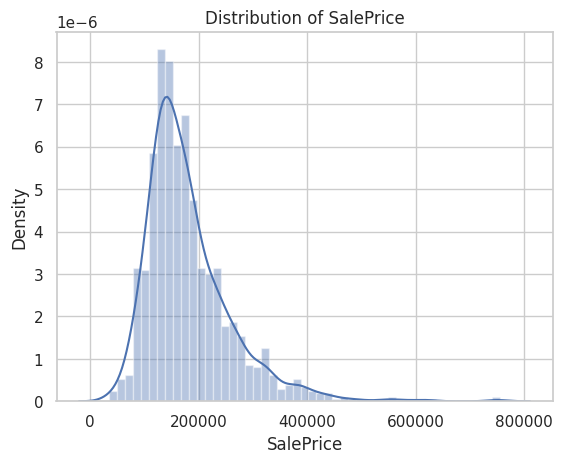

In [936]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(housing_df['SalePrice'])
plt.show()

In [937]:
#There is a high degree of skew in this column
housing_df.SalePrice.skew()

1.8831110462405252

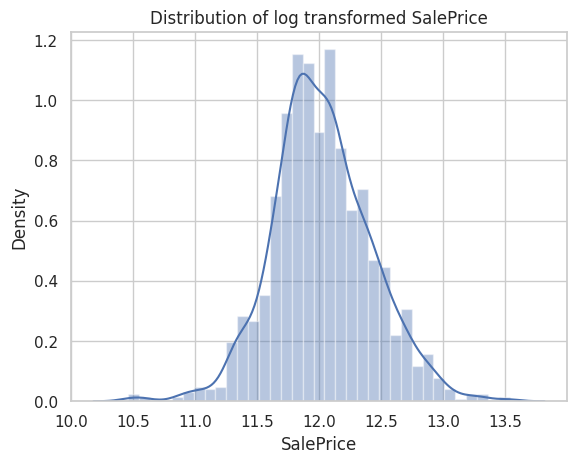

In [938]:
sns.distplot(np.log(housing_df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [939]:
#We are able to get the skew down to a great extent by using log transform
np.log(housing_df['SalePrice']).skew()

0.12193841342297697

**Observation**:

Log transformed SalePrice is normally distributed, hence transformed data will be used for model building


### Train - Test Split

In [940]:
# Split X and y for model
y = np.log(housing_df['SalePrice'])
X = housing_df.drop("SalePrice", axis=1)

In [941]:
# splitting the dataframe into Train and Test
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [942]:
## View dimensions of train data
print(X_train.shape)
print(y_train.shape)
## View dimensions of test data
print(X_test.shape)
print(y_test.shape)

(1015, 89)
(1015,)
(436, 89)
(436,)


### Feature Scaling

* We perform scaling to bring the all variables to same scale , also scaling helps in optimisation of the model
* Scaling are basically 2 types, min-max (normalisation) and standardisation
* Here we will perform Min-max Scaling on Continous Columns.This is because min-max scaling also handles the outliers of the variables and keep all values between 0 and 1

In [943]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'Utilities',
 'LandSlope',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtUnfSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'YrSold']

In [944]:
## Create a scaling instance
scaler = StandardScaler()

## Scale the numerical columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Linear Regression

We will first begin by running Recursive Feature Elimination to determine the top 50 most important features by fitting a linear regression model on the data.

#### RFE Implementation for feature selection

In [945]:
# Create a Linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=50)
rfe = rfe.fit(X_train, y_train)

In [946]:
top_50_cols = X_train.columns[rfe.support_]

X_train_rfe = X_train[top_50_cols]

In [947]:
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    vif_data = vif_data.sort_values(by = "VIF", ascending = False)
    return vif_data

def drop_high_vif_columns(data_frame, threshold=5):
    vif_data = calculate_vif(data_frame)
    high_vif_columns = vif_data[vif_data['VIF'] > threshold]['Variable'].tolist()

    while high_vif_columns:
        print(f"Dropping columns with VIF greater than {threshold}: {high_vif_columns[0]}")
        data_frame = data_frame.drop(columns=high_vif_columns[0])
        vif_data = calculate_vif(data_frame)
        high_vif_columns = vif_data[vif_data['VIF'] > threshold]['Variable'].tolist()

    return data_frame

In [948]:
# Drop columns iteratively until all VIF values are below 5
X_train_rfe = drop_high_vif_columns(X_train_rfe)

# Display the final VIF values
final_vif = calculate_vif(X_train_rfe)
print("Final VIF values:")
print(final_vif)

Dropping columns with VIF greater than 5: SaleCondition_Partial
Dropping columns with VIF greater than 5: GrLivArea
Dropping columns with VIF greater than 5: MasVnrType_None
Dropping columns with VIF greater than 5: MSZoning_RL
Dropping columns with VIF greater than 5: Exterior1st_MetalSd
Dropping columns with VIF greater than 5: Alley_None
Dropping columns with VIF greater than 5: PavedDrive_Y
Dropping columns with VIF greater than 5: GarageType_Attchd
Dropping columns with VIF greater than 5: Fence_None
Dropping columns with VIF greater than 5: SaleCondition_Normal
Dropping columns with VIF greater than 5: Condition1_Norm
Dropping columns with VIF greater than 5: YearBuilt
Final VIF values:
                Variable       VIF
30   Exterior2nd_Wd Sdng  4.896131
27   Exterior1st_Wd Sdng  4.890596
23       RoofStyle_Gable  4.379541
33      Foundation_PConc  4.224806
26   Exterior1st_VinylSd  4.075603
1            OverallQual  3.442738
25   Exterior1st_Plywood  2.970278
29   Exterior2nd_P

In [949]:
def drop_high_p_values(X_train, y_train, threshold=0.05):
    while True:
        X_train_sm = sm.add_constant(X_train)
        lm = sm.OLS(y_train, X_train_sm).fit()
        # Getting p-values for each feature
        p_values = lm.pvalues[1:]  # Exclude the constant term
        # Check if any p-value is greater than the threshold
        max_p_value = p_values.max()
        if max_p_value > threshold:
            feature_to_drop = p_values.idxmax()
            print(f"Dropping feature with p-value {max_p_value}: {feature_to_drop}")
            X_train = X_train.drop(columns=feature_to_drop)
        else:
            break

    # Final model summary
    X_train_sm = sm.add_constant(X_train)
    final_lm = sm.OLS(y_train, X_train_sm).fit()
    print(final_lm.summary())
    return X_train


In [950]:
# Drop features iteratively until all p-values are below 0.05
X_train_rfe = drop_high_p_values(X_train_rfe, y_train)

Dropping feature with p-value 0.9915081749830907: Exterior1st_HdBoard
Dropping feature with p-value 0.9813308625801508: GarageType_BuiltIn
Dropping feature with p-value 0.7610195056268764: MasVnrType_Stone
Dropping feature with p-value 0.612626151003923: MasVnrType_BrkFace
Dropping feature with p-value 0.5132664028379432: Fence_MnPrv
Dropping feature with p-value 0.466354268396159: GarageType_Detchd
Dropping feature with p-value 0.3947546793502873: Exterior1st_Plywood
Dropping feature with p-value 0.4545668302601693: Exterior2nd_Plywood
Dropping feature with p-value 0.47164835416261097: Exterior2nd_MetalSd
Dropping feature with p-value 0.16299771304159377: Neighborhood_NAmes
Dropping feature with p-value 0.27330219889294227: Neighborhood_Sawyer
Dropping feature with p-value 0.1750841963606977: RoofStyle_Gable
Dropping feature with p-value 0.09275859337360895: BldgType_TwnhsE
Dropping feature with p-value 0.09490408909933593: SaleType_New
Dropping feature with p-value 0.0653572552757630

In [951]:
# Final predictors
print(len(X_train_rfe.columns))
print('Final predictors for Liner Regression : ',X_train_rfe.columns)

23
Final predictors for Liner Regression :  Index(['LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtQual',
       'BsmtFinSF1', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'Functional', 'Fireplaces', 'GarageArea', 'MSZoning_RM',
       'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Foundation_PConc'],
      dtype='object')


In [952]:
# Create a final model object for Linear regression model
lr_model = LinearRegression()
# Create the model
lr_model.fit(X_train_rfe, y_train)
print("Intercept    : ", lr_model.intercept_)
print("Coefficients : ", lr_model.coef_)

Intercept    :  12.00566837391664
Coefficients :  [ 0.03411713  0.10246115  0.04557033 -0.02887022  0.02617385  0.03302804
  0.02569353  0.13068472  0.10676174  0.01380389 -0.02371346  0.02203315
  0.03726551 -0.06440527  0.04734141 -0.07635805 -0.04861461  0.07652937
 -0.06732688  0.06437435  0.02510925 -0.03699156  0.06401278]


In [953]:
X_test_rfe = X_test[X_train_rfe.columns]
y_pred_train = lr_model.predict(X_train_rfe)
y_pred_test = lr_model.predict(X_test_rfe)

#### Model Evaluation


1. Residual Analysis - Train vs Test
  * Homoscedasticity
  * Normality of Error Terms

2. Comparing R-squared, adjusted R-squared, RSS, and RMSE for training and test data



In [954]:
def model_evaluation(y_true_train, y_pred_train, y_true_test, y_pred_test, num_features):
    """
    Calculate regression metrics for training and test data.

    Parameters:
    - y_true_train: Actual target values for the training set (pd.DataFrame or pd.Series)
    - y_pred_train: Predicted target values for the training set (pd.DataFrame or pd.Series)
    - y_true_test: Actual target values for the test set (pd.DataFrame or pd.Series)
    - y_pred_test: Predicted target values for the test set (pd.DataFrame or pd.Series)
    - num_features: Number of features used in the model (int)

    Returns:
    - metrics_df: A DataFrame containing R-squared, adjusted R-squared, RSS, and RMSE for training and test data.
    """

    # Calculate R-squared
    r2_train = r2_score(y_true_train, y_pred_train)
    r2_test = r2_score(y_true_test, y_pred_test)

    # Calculate adjusted R-squared
    adj_r2_train = 1 - ((1 - r2_train) * (len(y_true_train) - 1) / (len(y_true_train) - num_features - 1))
    adj_r2_test = 1 - ((1 - r2_test) * (len(y_true_test) - 1) / (len(y_true_test) - num_features - 1))

    # Calculate Residual Sum of Squares (RSS)
    rss_train = np.sum((y_true_train - y_pred_train) ** 2)
    rss_test = np.sum((y_true_test - y_pred_test) ** 2)

    # Calculate Root Mean Squared Error (RMSE)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_true_test, y_pred_test))

    y_res_train = y_train - y_pred_train
    y_res_test = y_test - y_pred_test

    plt.figure(figsize=(20, 12))
    sns.set(font_scale= 1)
    sns.set_style('whitegrid')

    plt.subplot(2,3,1)
    sns.scatterplot(x=y_pred_test,y=y_res_test,color='Blue')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Homoscedasticity')
    plt.xlabel("Train Predictions")
    plt.ylabel("Train Residual")

    plt.subplot(2,3,2)
    p = sns.distplot(y_res_train,kde=True,color='Blue')
    p = plt.title('Normality of error terms/residuals on Train Data')
    plt.xlabel("Residuals")

    plt.subplot(2,3,3)
    sns.regplot(x=y_train, y=y_pred_train,color='Blue', line_kws={"color": "red"})
    plt.title('Predicted Points Vs. Actual Points on Train Data')
    plt.xlabel('Actual Points')
    plt.ylabel('Predicted Points')

    plt.subplot(2,3,4)
    sns.scatterplot(x=y_pred_test,y=y_res_test,color='Green')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Homoscedasticity')
    plt.xlabel("Test Predictions")
    plt.ylabel("Test Residual")

    plt.subplot(2,3,5)
    sns.distplot(y_res_test,kde=True,color='Green')
    plt.title('Normality of error terms/residuals on Test Data')
    plt.xlabel("Residuals")

    plt.subplot(2,3,6)
    sns.regplot(x=y_test, y=y_pred_test,color='Green', line_kws={"color": "red"})
    plt.title('Predicted Points Vs. Actual Points on Test Data')
    plt.xlabel('Actual Points')
    plt.ylabel('Predicted Points')

    sns.despine()

    # Create a dictionary to store the metrics
    metrics_dict = {
        'R-squared (Train)': r2_train,
        'R-squared (Test)': r2_test,
        'Difference in R-squared Train and Test': r2_train - r2_test,
        'Adjusted R-squared (Train)': adj_r2_train,
        'Adjusted R-squared (Test)': adj_r2_test,
        'RSS (Train)': rss_train,
        'RSS (Test)': rss_test,
        'RMSE (Train)': rmse_train,
        'RMSE (Test)': rmse_test
    }
    return metrics_dict


{'R-squared (Train)': 0.8909476742680863,
 'R-squared (Test)': 0.8912685979503118,
 'Difference in R-squared Train and Test': -0.0003209236822254713,
 'Adjusted R-squared (Train)': 0.8884166919352569,
 'Adjusted R-squared (Test)': 0.885198641039771,
 'RSS (Train)': 17.735426953734983,
 'RSS (Test)': 7.472019659974054,
 'RMSE (Train)': 0.13218671282702646,
 'RMSE (Test)': 0.13091088484378482}

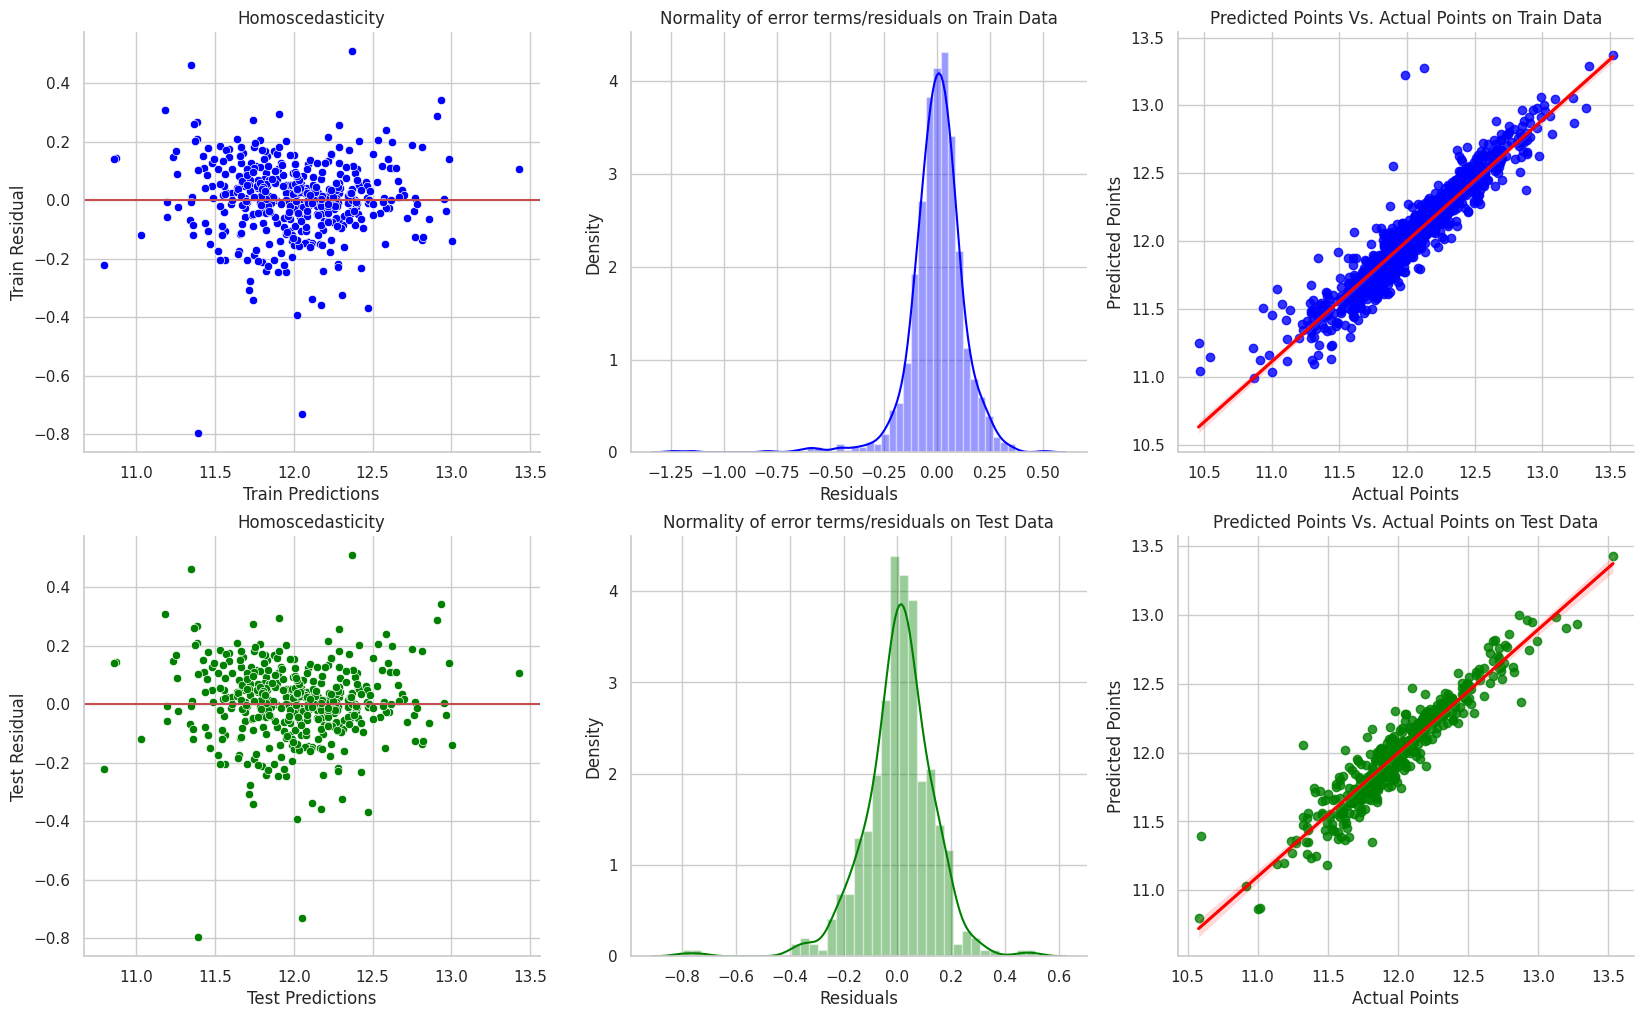

In [955]:
lr_metrics = model_evaluation(y_train, y_pred_train, y_test, y_pred_test, X_train_rfe.shape[1])
lr_metrics


Now we can choose to proceed with the set of features identified by RFE, but we can also take the route of directly going to ridge and lasso techniques. We can let the lasso model take care of feature selection as well.

### Ridge Regression

In [956]:
def build_advanced_model(X_train, y_train, X_test, params, model_type='ridge'):
    # Selecting the appropriate model based on the specified type
    if model_type == 'ridge':
        estimator_model = Ridge()
    else:
        estimator_model = Lasso()

    # Cross-validation
    folds = KFold(n_splits=5, shuffle=True, random_state=1)
    model_cv = GridSearchCV(estimator=estimator_model,
                            param_grid=params,
                            scoring='neg_mean_absolute_error',
                            cv=folds,
                            return_train_score=True,
                            verbose=1)

    # Fitting the model and finding the optimum alpha
    model_cv.fit(X_train, y_train)
    alpha = model_cv.best_params_["alpha"]
    print(f"Optimum alpha for {model_type} regression is {alpha}")

    # Training the final model
    final_model = model_cv.best_estimator_
    final_model.fit(X_train, y_train)

    # Making predictions on the training and test sets
    y_pred_train = final_model.predict(X_train)
    y_pred_test = final_model.predict(X_test)

    return final_model, y_pred_train, y_pred_test


In [957]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_model, y_pred_train, y_pred_test = build_advanced_model(X_train, y_train, X_test, params, model_type='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge regression is 20


{'R-squared (Train)': 0.9107028071841466,
 'R-squared (Test)': 0.904700011345005,
 'Difference in R-squared Train and Test': 0.00600279583914165,
 'Adjusted R-squared (Train)': 0.9107028071841466,
 'Adjusted R-squared (Test)': 0.904700011345005,
 'RSS (Train)': 14.522604903012034,
 'RSS (Test)': 6.549013214232424,
 'RMSE (Train)': 0.11961599026100245,
 'RMSE (Test)': 0.12255885324898971}

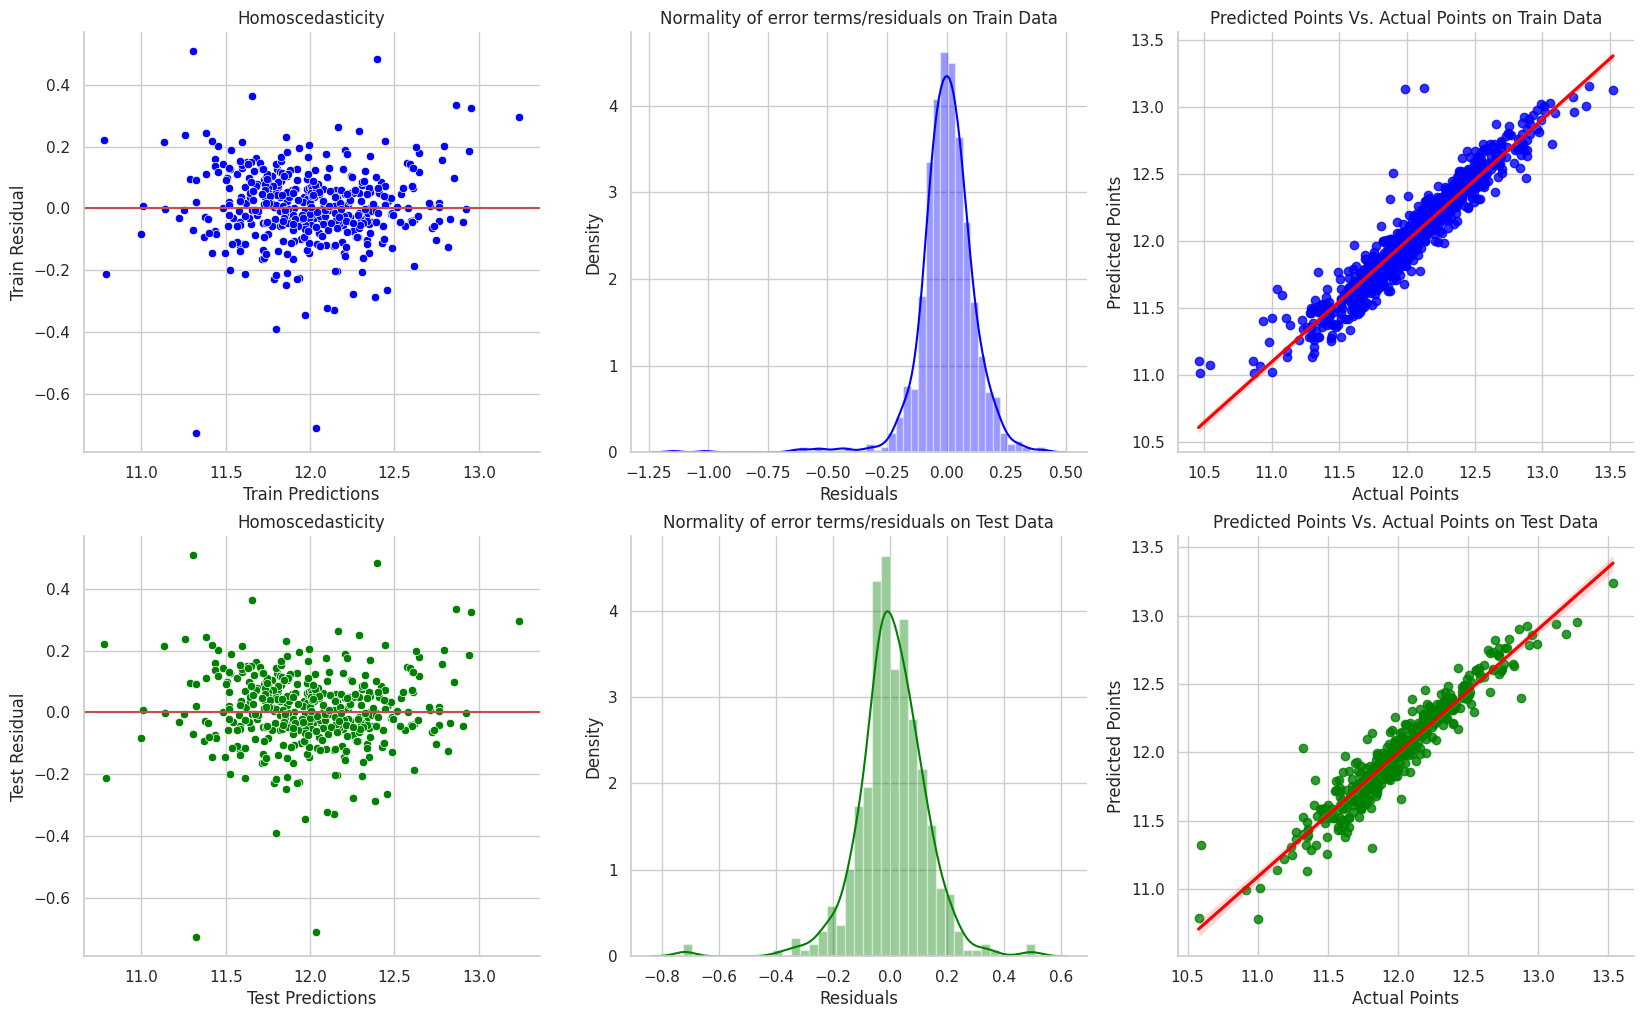

In [958]:
ridge_metrics = model_evaluation(y_train, y_pred_train, y_test, y_pred_test, len(params)-1)
ridge_metrics

> Errors are normally distributed is indicated by mean is 0

### Lasso Regression

In [959]:
lasso_model, y_pred_train, y_pred_test  = build_advanced_model(X_train, y_train, X_test, params, model_type='lasso')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for lasso regression is 0.001


{'R-squared (Train)': 0.9093369178588072,
 'R-squared (Test)': 0.9027289678855496,
 'Difference in R-squared Train and Test': 0.006607949973257643,
 'Adjusted R-squared (Train)': 0.9093369178588072,
 'Adjusted R-squared (Test)': 0.9027289678855496,
 'RSS (Train)': 14.744742580442184,
 'RSS (Test)': 6.6844632792742065,
 'RMSE (Train)': 0.12052734121655224,
 'RMSE (Test)': 0.12381977950432828}

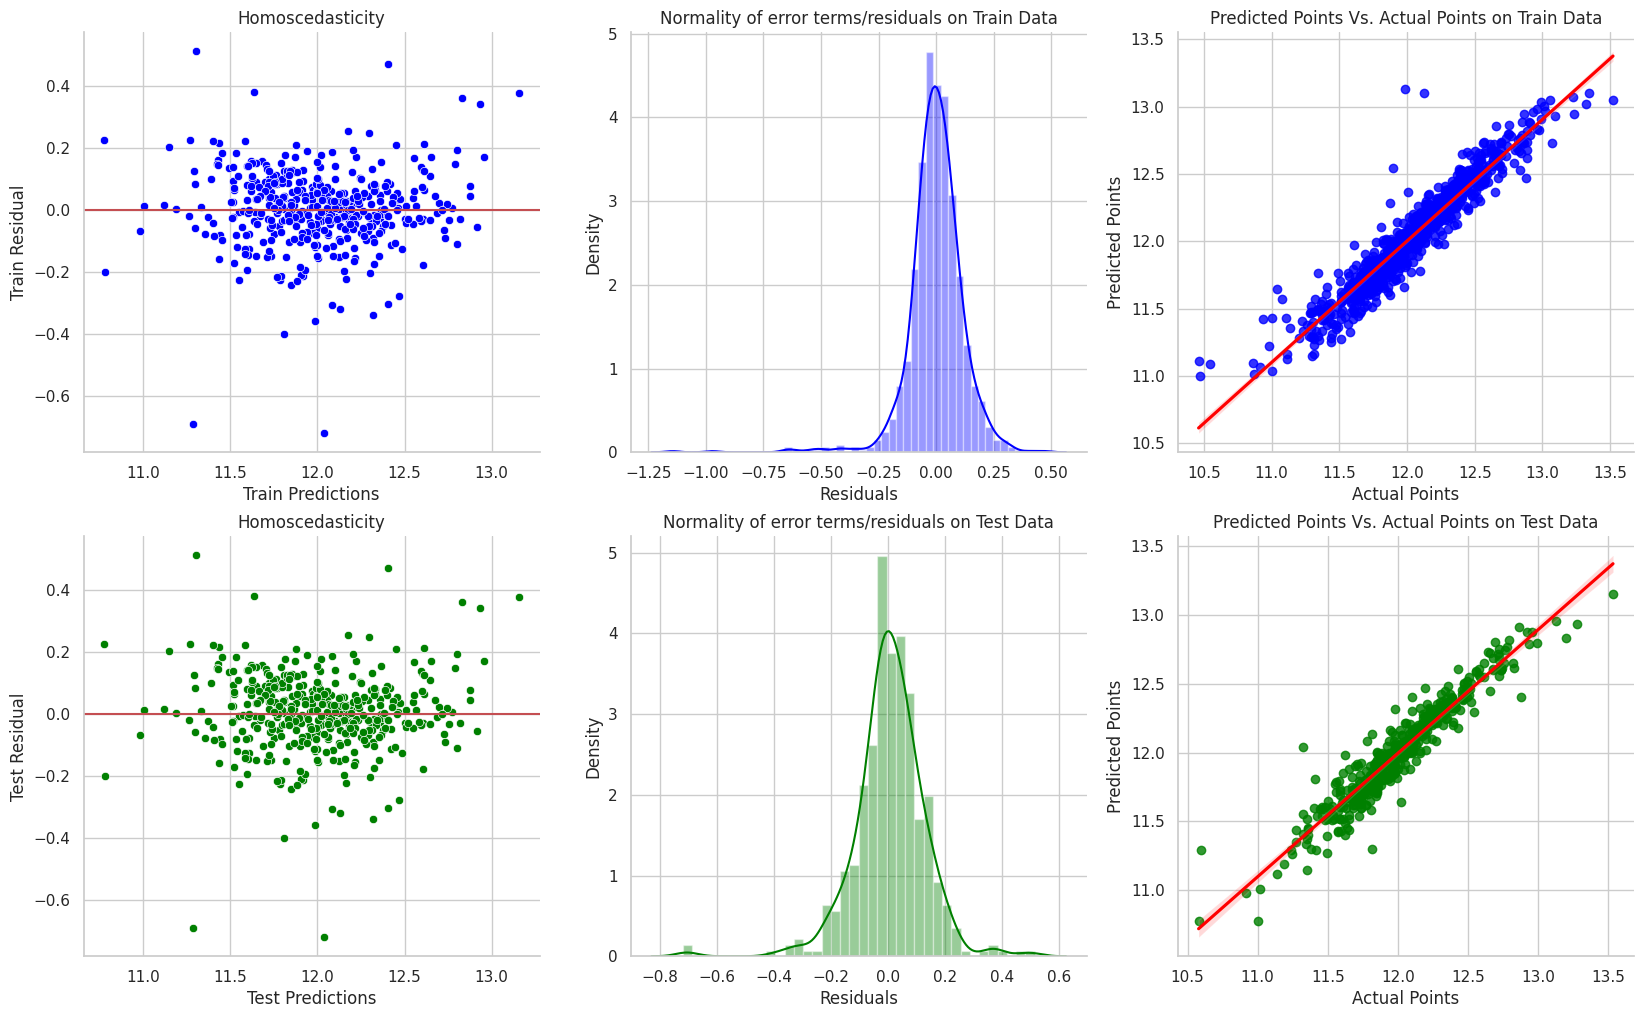

In [960]:
lasso_metrics = model_evaluation(y_train, y_pred_train, y_test, y_pred_test, len(params)-1)
lasso_metrics

### Model Comparison - Linear vs Ridge vs Lasso

In [961]:
lr_metric = pd.Series(lr_metrics, name = 'Linear Regression')
rg_metric = pd.Series(ridge_metrics, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metrics, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Linear Regression  Ridge Regression  \
R-squared (Train)                                0.890948          0.910703   
R-squared (Test)                                 0.891269          0.904700   
Difference in R-squared Train and Test          -0.000321          0.006003   
Adjusted R-squared (Train)                       0.888417          0.910703   
Adjusted R-squared (Test)                        0.885199          0.904700   
RSS (Train)                                     17.735427         14.522605   
RSS (Test)                                       7.472020          6.549013   
RMSE (Train)                                     0.132187          0.119616   
RMSE (Test)                                      0.130911          0.122559   

                                        Lasso Regression  
R-squared (Train)                               0.909337  
R-squared (Test)                                0.902729  
Difference in R-squared Train and Test          0.006608  
Adjusted R-squared (Train)                      0.909337  
Adjusted R-squared (Test)                       0.902729  
RSS (Train)                                    14.744743  
RSS (Test)                                      6.684463  
RMSE (Train)                                    0.120527  
RMSE (Test)                                     0.123820

**Observation**
* Though the all three models showing best performance in terms of R2 values of Train and Test, It is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose the predictive variables.

### Final Model

* Optimal value of lambda for Ridge Regression = 20
* Optimal value of lambda for Lasso = 0.001

In [962]:
model_coefficients = pd.DataFrame(index=X_test.columns)
model_coefficients.rows = X_test.columns
model_coefficients['Ridge (alpha=20.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso_model.coef_
# Sorting the DataFrame by 'Lasso (alpha=0.001)' column in descending order
model_coefficients.sort_values(by='Lasso (alpha=0.001)', ascending=False, inplace=True)
model_coefficients

Ridge (alpha=20.0)  Lasso (alpha=0.001)
GrLivArea                       0.092274             0.130811
OverallQual                     0.085183             0.090501
SaleType_New                    0.043348             0.075172
Neighborhood_Somerst            0.047320             0.071047
Condition1_Norm                 0.059733             0.067794
...                                  ...                  ...
YearRemodAdd                   -0.013765            -0.014340
Exterior1st_Wd Sdng            -0.025529            -0.015866
Functional                     -0.025546            -0.026330
YearBuilt                      -0.024447            -0.026885
Neighborhood_Edwards           -0.047520            -0.033835

[89 rows x 2 columns]

Top features influencing the sales price based on the lasso model as below

In [963]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).head(10)

Lasso (alpha=0.001)
GrLivArea                        0.130811
OverallQual                      0.090501
SaleType_New                     0.075172
Neighborhood_Somerst             0.071047
Condition1_Norm                  0.067794
SaleCondition_Normal             0.056937
MSZoning_RL                      0.051083
OverallCond                      0.042932
Neighborhood_NridgHt             0.040432
1stFlrSF                         0.036083

In [964]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:10]

Index(['GrLivArea', 'OverallQual', 'SaleType_New', 'Neighborhood_Somerst',
       'Condition1_Norm', 'SaleCondition_Normal', 'MSZoning_RL', 'OverallCond',
       'Neighborhood_NridgHt', '1stFlrSF'],
      dtype='object')

## Subjective Questions Code
---

#### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

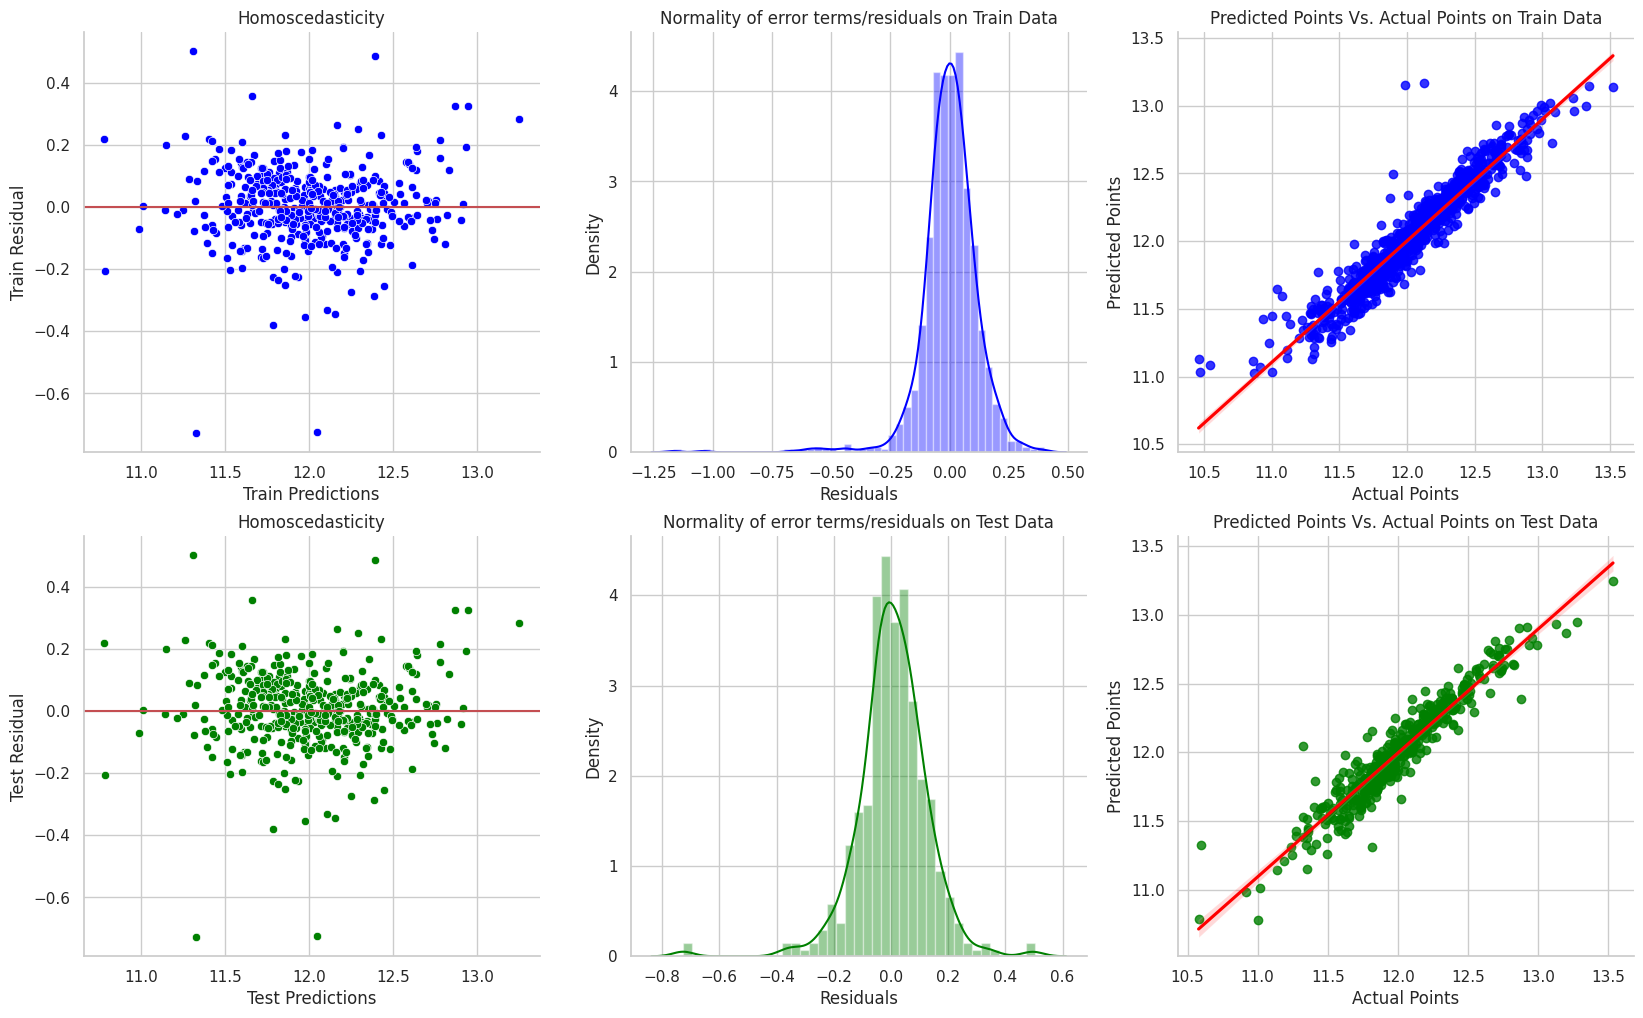

In [965]:
# Model Building
ridge_model_2 = Ridge(alpha=40.0)
ridge_model_2.fit(X_train, y_train)

# Predicting
y_pred_train = ridge_model_2.predict(X_train)
y_pred_test = ridge_model_2.predict(X_test)

ridge_metrics_2 = model_evaluation(y_train, y_pred_train, y_test, y_pred_test, X_train.shape[1])

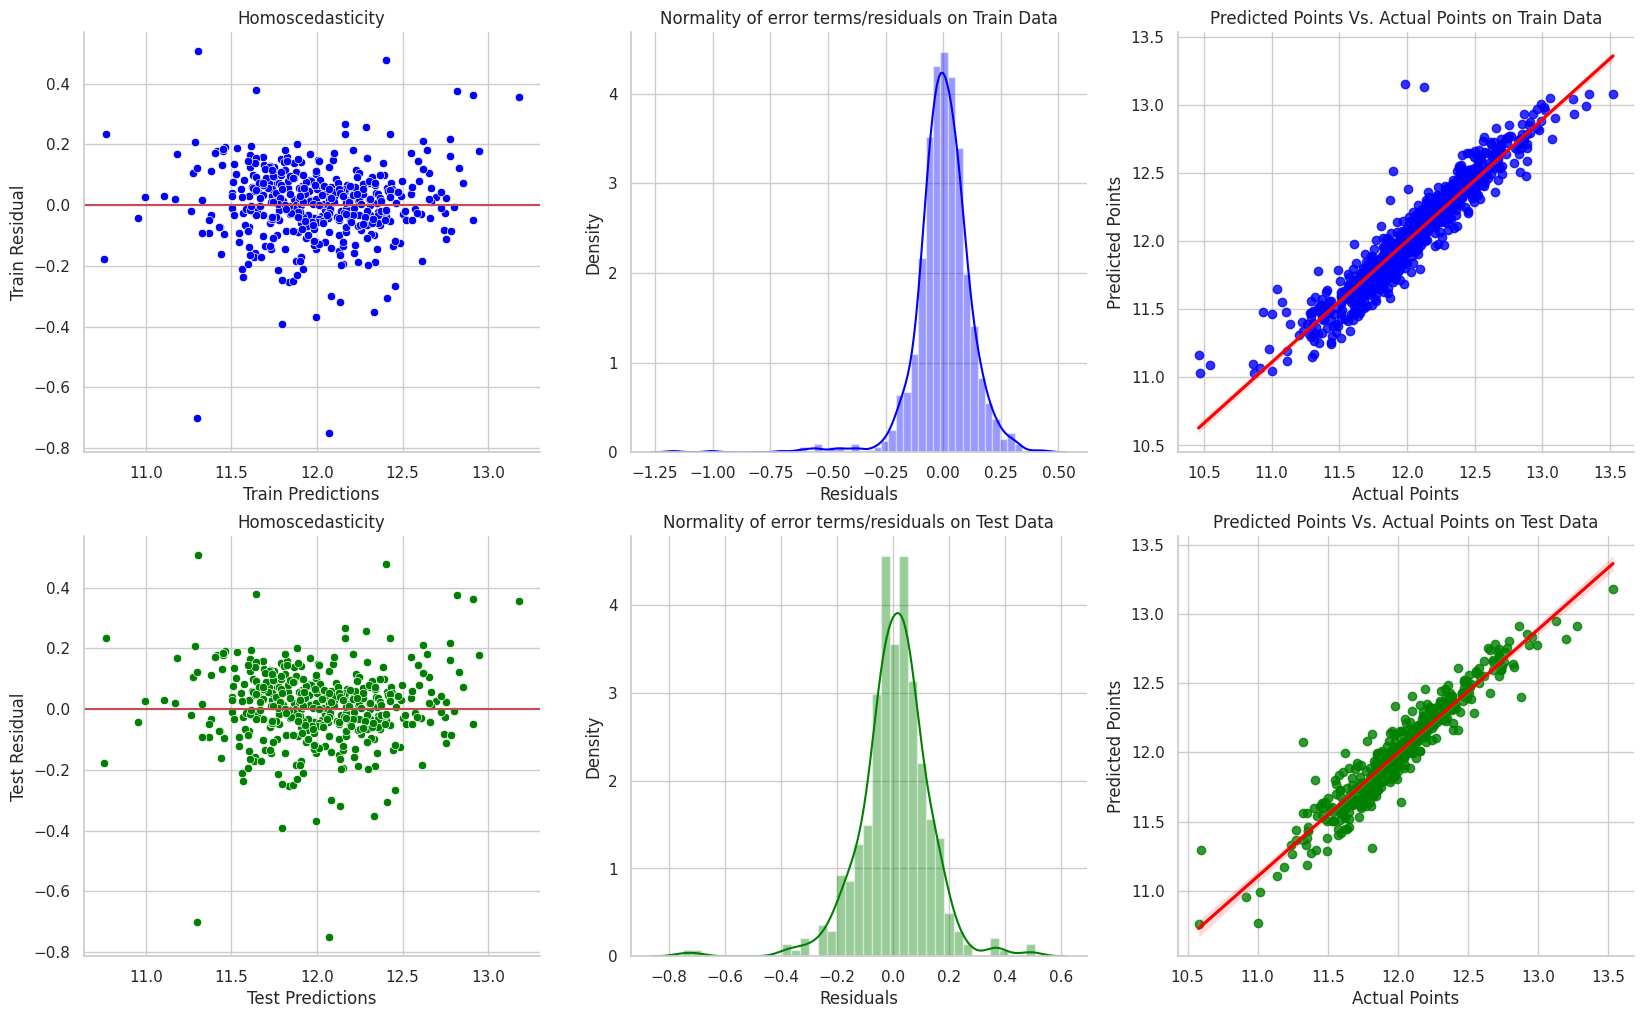

In [966]:
# Model Building
lasso_model_2 = Lasso(alpha=0.002)
lasso_model_2.fit(X_train, y_train)

# Predicting
y_pred_train = lasso_model_2.predict(X_train)
y_pred_test = lasso_model_2.predict(X_test)

lasso_metrics_2= model_evaluation(y_train, y_pred_train, y_test, y_pred_test, X_train.shape[1])

In [967]:
model_coefficients['Ridge (alpha=40.0)'] = ridge_model_2.coef_
model_coefficients['Lasso (alpha=0.002)'] = lasso_model_2.coef_
pd.set_option('display.max_rows', None)
model_coefficients.sort_values(by=['Lasso (alpha=0.002)'],ascending=False, inplace=True)

In [968]:
#Top predictors for Ridge
ridge_coff = model_coefficients[['Ridge (alpha=40.0)']].sort_values(by='Ridge (alpha=40.0)', ascending=False)
ridge_coff.head(5)

Ridge (alpha=40.0)
BsmtFinType1                 0.084533
OverallCond                  0.082265
BsmtExposure                 0.055698
GarageType_Detchd            0.051295
YearBuilt                    0.044811

In [969]:
#Top predictors for Lasso
lasso_coff = model_coefficients[['Lasso (alpha=0.002)']].sort_values(by=['Lasso (alpha=0.002)'],ascending=False)
lasso_coff.head(5)

Lasso (alpha=0.002)
BsmtFinType1                     0.129005
OverallCond                      0.092486
GarageType_Detchd                0.060301
Exterior1st_Wd Sdng              0.040977
Neighborhood_NridgHt             0.040490

#### Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Though the both Ridge and Lasso models are showing best performance in terms of R2 values of Train and Test, It is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose the predictive variables.

In [970]:
rg_metric_1 = pd.Series(ridge_metrics, name = 'Ridge (alpha=20.0)')
ls_metric_1 = pd.Series(lasso_metrics, name = 'Lasso (alpha=0.001)')

rg_metric_2 = pd.Series(ridge_metrics_2, name = 'Ridge (alpha=40.0)')
ls_metric_2 = pd.Series(lasso_metrics_2, name = 'Lasso (alpha=0.002)')

new_metric = pd.concat([rg_metric_1, rg_metric_2, ls_metric_1, ls_metric_2], axis = 1)

new_metric

Ridge (alpha=20.0)  \
R-squared (Train)                                 0.910703   
R-squared (Test)                                  0.904700   
Difference in R-squared Train and Test            0.006003   
Adjusted R-squared (Train)                        0.910703   
Adjusted R-squared (Test)                         0.904700   
RSS (Train)                                      14.522605   
RSS (Test)                                        6.549013   
RMSE (Train)                                      0.119616   
RMSE (Test)                                       0.122559   

                                        Ridge (alpha=40.0)  \
R-squared (Train)                                 0.908664   
R-squared (Test)                                  0.904712   
Difference in R-squared Train and Test            0.003952   
Adjusted R-squared (Train)                        0.899876   
Adjusted R-squared (Test)                         0.880202   
RSS (Train)                                      14.854144   
RSS (Test)                                        6.548161   
RMSE (Train)                                      0.120974   
RMSE (Test)                                       0.122551   

                                        Lasso (alpha=0.001)  \
R-squared (Train)                                  0.909337   
R-squared (Test)                                   0.902729   
Difference in R-squared Train and Test             0.006608   
Adjusted R-squared (Train)                         0.909337   
Adjusted R-squared (Test)                          0.902729   
RSS (Train)                                       14.744743   
RSS (Test)                                         6.684463   
RMSE (Train)                                       0.120527   
RMSE (Test)                                        0.123820   

                                        Lasso (alpha=0.002)  
R-squared (Train)                                  0.904286  
R-squared (Test)                                   0.900265  
Difference in R-squared Train and Test             0.004021  
Adjusted R-squared (Train)                         0.895077  
Adjusted R-squared (Test)                          0.874611  
RSS (Train)                                       15.566218  
RSS (Test)                                         6.853793  
RMSE (Train)                                       0.123839  
RMSE (Test)                                        0.125378

In [971]:
# Top 5 featues in Lasso final model
lasso_top5_vars = model_coefficients[['Lasso (alpha=0.001)']].sort_values(by=['Lasso (alpha=0.001)'],ascending=False).head(5)
lasso_top5_vars

Lasso (alpha=0.001)
GrLivArea                        0.130811
OverallQual                      0.090501
SaleType_New                     0.075172
Neighborhood_Somerst             0.071047
Condition1_Norm                  0.067794

#### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

The top 5 features from the orignal Lasso model will be removed from the training (and test) set, and the model will be re-tuned and re-evaluated.

In [972]:
#dropping the top 5 most important predictor variables in the lasso model
drop_cols = lasso_top5_vars.T.columns
X_train_new = X_train.drop(labels = drop_cols, axis = 1)
X_test_new = X_test.drop(labels = drop_cols, axis = 1)
print(X_train_new.shape)
print(X_test_new.shape)

(1015, 84)
(436, 84)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for lasso regression is 0.001
Model Evaluation : Lasso Regression (alpha = 0.001)


{'R-squared (Train)': 0.8914944449554514,
 'R-squared (Test)': 0.8944040536437152,
 'Difference in R-squared Train and Test': -0.0029096086882638428,
 'Adjusted R-squared (Train)': 0.8816939432094921,
 'Adjusted R-squared (Test)': 0.8691332288746898,
 'RSS (Train)': 17.646504397328016,
 'RSS (Test)': 7.256551210727147,
 'RMSE (Train)': 0.13185491503185295,
 'RMSE (Test)': 0.129009558094156}

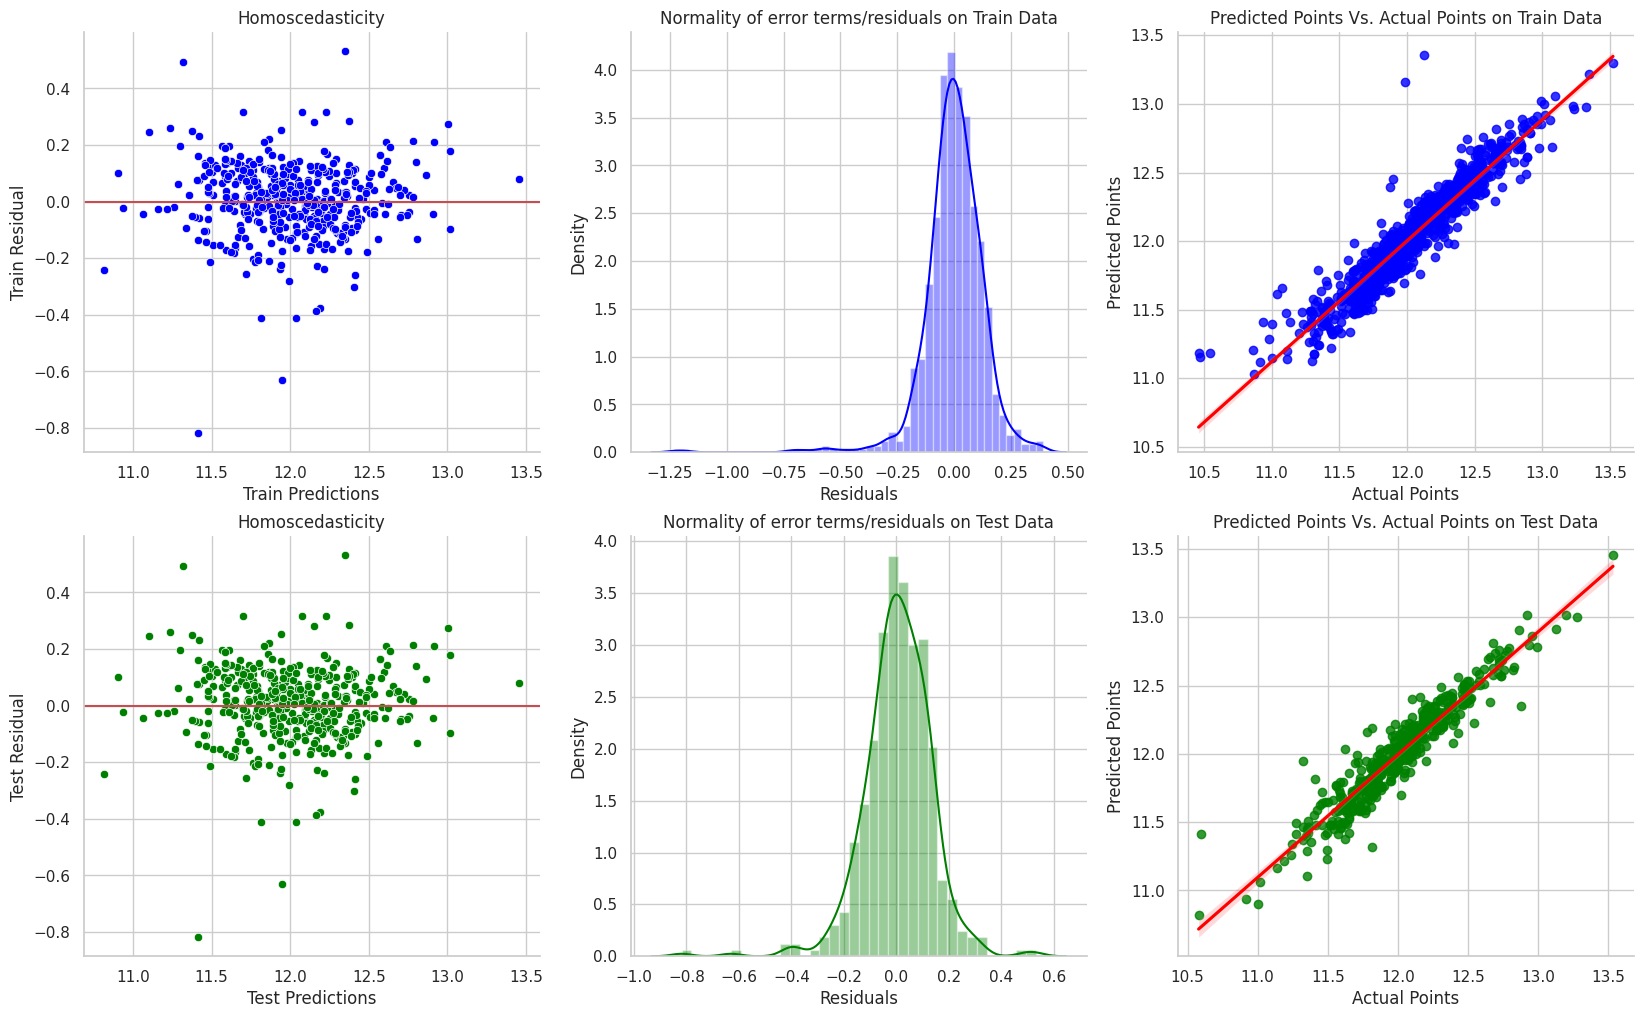

In [973]:
# Model Building
lasso_model, y_pred_train, y_pred_test  = build_advanced_model(X_train_new, y_train, X_test_new, params, model_type='lasso')
print("Model Evaluation : Lasso Regression (alpha = 0.001)")
model_evaluation(y_train, y_pred_train, y_test, y_pred_test, X_train_new.shape[1])

In [974]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False, inplace = True)
model_coeff.head(5)

Lasso
1stFlrSF              0.138401
2ndFlrSF              0.114876
SaleCondition_Normal  0.056831
Neighborhood_NridgHt  0.051887
OverallCond           0.050632